In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set styling for visualizations
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


In [ ]:
# Load the dataset (assuming the full dataset is used)
# Replace with the actual path to your dataset
df = pd.read_csv('bank-full.csv', sep=';')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic dataset information
print("\nDataset shape:", df.shape)
print("\nDataset info:")
display(df.info())

# Statistical summary
print("\nStatistical summary of numeric variables:")
display(df.describe())

# Count of unique values for categorical variables
print("\nUnique values in categorical variables:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values - {', '.join(df[col].unique())}")


First 5 rows of the dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



Dataset shape: (45211, 17)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None


Statistical summary of numeric variables:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



Unique values in categorical variables:
job: 12 unique values - management, technician, entrepreneur, blue-collar, unknown, retired, admin., services, self-employed, unemployed, housemaid, student
marital: 3 unique values - married, single, divorced
education: 4 unique values - tertiary, secondary, unknown, primary
default: 2 unique values - no, yes
housing: 2 unique values - yes, no
loan: 2 unique values - no, yes
contact: 3 unique values - unknown, cellular, telephone
month: 12 unique values - may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep
poutcome: 4 unique values - unknown, failure, other, success
y: 2 unique values - no, yes


In [ ]:
# Check for missing values
print("Missing values in each column:")
display(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check basic statistics for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
display(df[numeric_cols].describe())

# Check value counts for categorical columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())
    print(f"Percentage distribution:")
    display(round(df[col].value_counts(normalize=True) * 100, 2))


Missing values in each column:


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Number of duplicate rows: 0


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



Value counts for job:


,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


Percentage distribution:


,proportion
job,
blue-collar,21.53
management,20.92
technician,16.80
admin.,11.44
services,9.19
retired,5.01
self-employed,3.49
entrepreneur,3.29
unemployed,2.88



Value counts for marital:


,count
marital,
married,27214
single,12790
divorced,5207


Percentage distribution:


,proportion
marital,
married,60.19
single,28.29
divorced,11.52



Value counts for education:


,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


Percentage distribution:


,proportion
education,
secondary,51.32
tertiary,29.42
primary,15.15
unknown,4.11



Value counts for default:


,count
default,
no,44396
yes,815


Percentage distribution:


,proportion
default,
no,98.2
yes,1.8



Value counts for housing:


,count
housing,
yes,25130
no,20081


Percentage distribution:


,proportion
housing,
yes,55.58
no,44.42



Value counts for loan:


,count
loan,
no,37967
yes,7244


Percentage distribution:


,proportion
loan,
no,83.98
yes,16.02



Value counts for contact:


,count
contact,
cellular,29285
unknown,13020
telephone,2906


Percentage distribution:


,proportion
contact,
cellular,64.77
unknown,28.80
telephone,6.43



Value counts for month:


,count
month,
may,13766
jul,6895
aug,6247
jun,5341
nov,3970
apr,2932
feb,2649
jan,1403
oct,738


Percentage distribution:


,proportion
month,
may,30.45
jul,15.25
aug,13.82
jun,11.81
nov,8.78
apr,6.49
feb,5.86
jan,3.10
oct,1.63



Value counts for poutcome:


,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


Percentage distribution:


,proportion
poutcome,
unknown,81.75
failure,10.84
other,4.07
success,3.34



Value counts for y:


,count
y,
no,39922
yes,5289


Percentage distribution:


,proportion
y,
no,88.3
yes,11.7


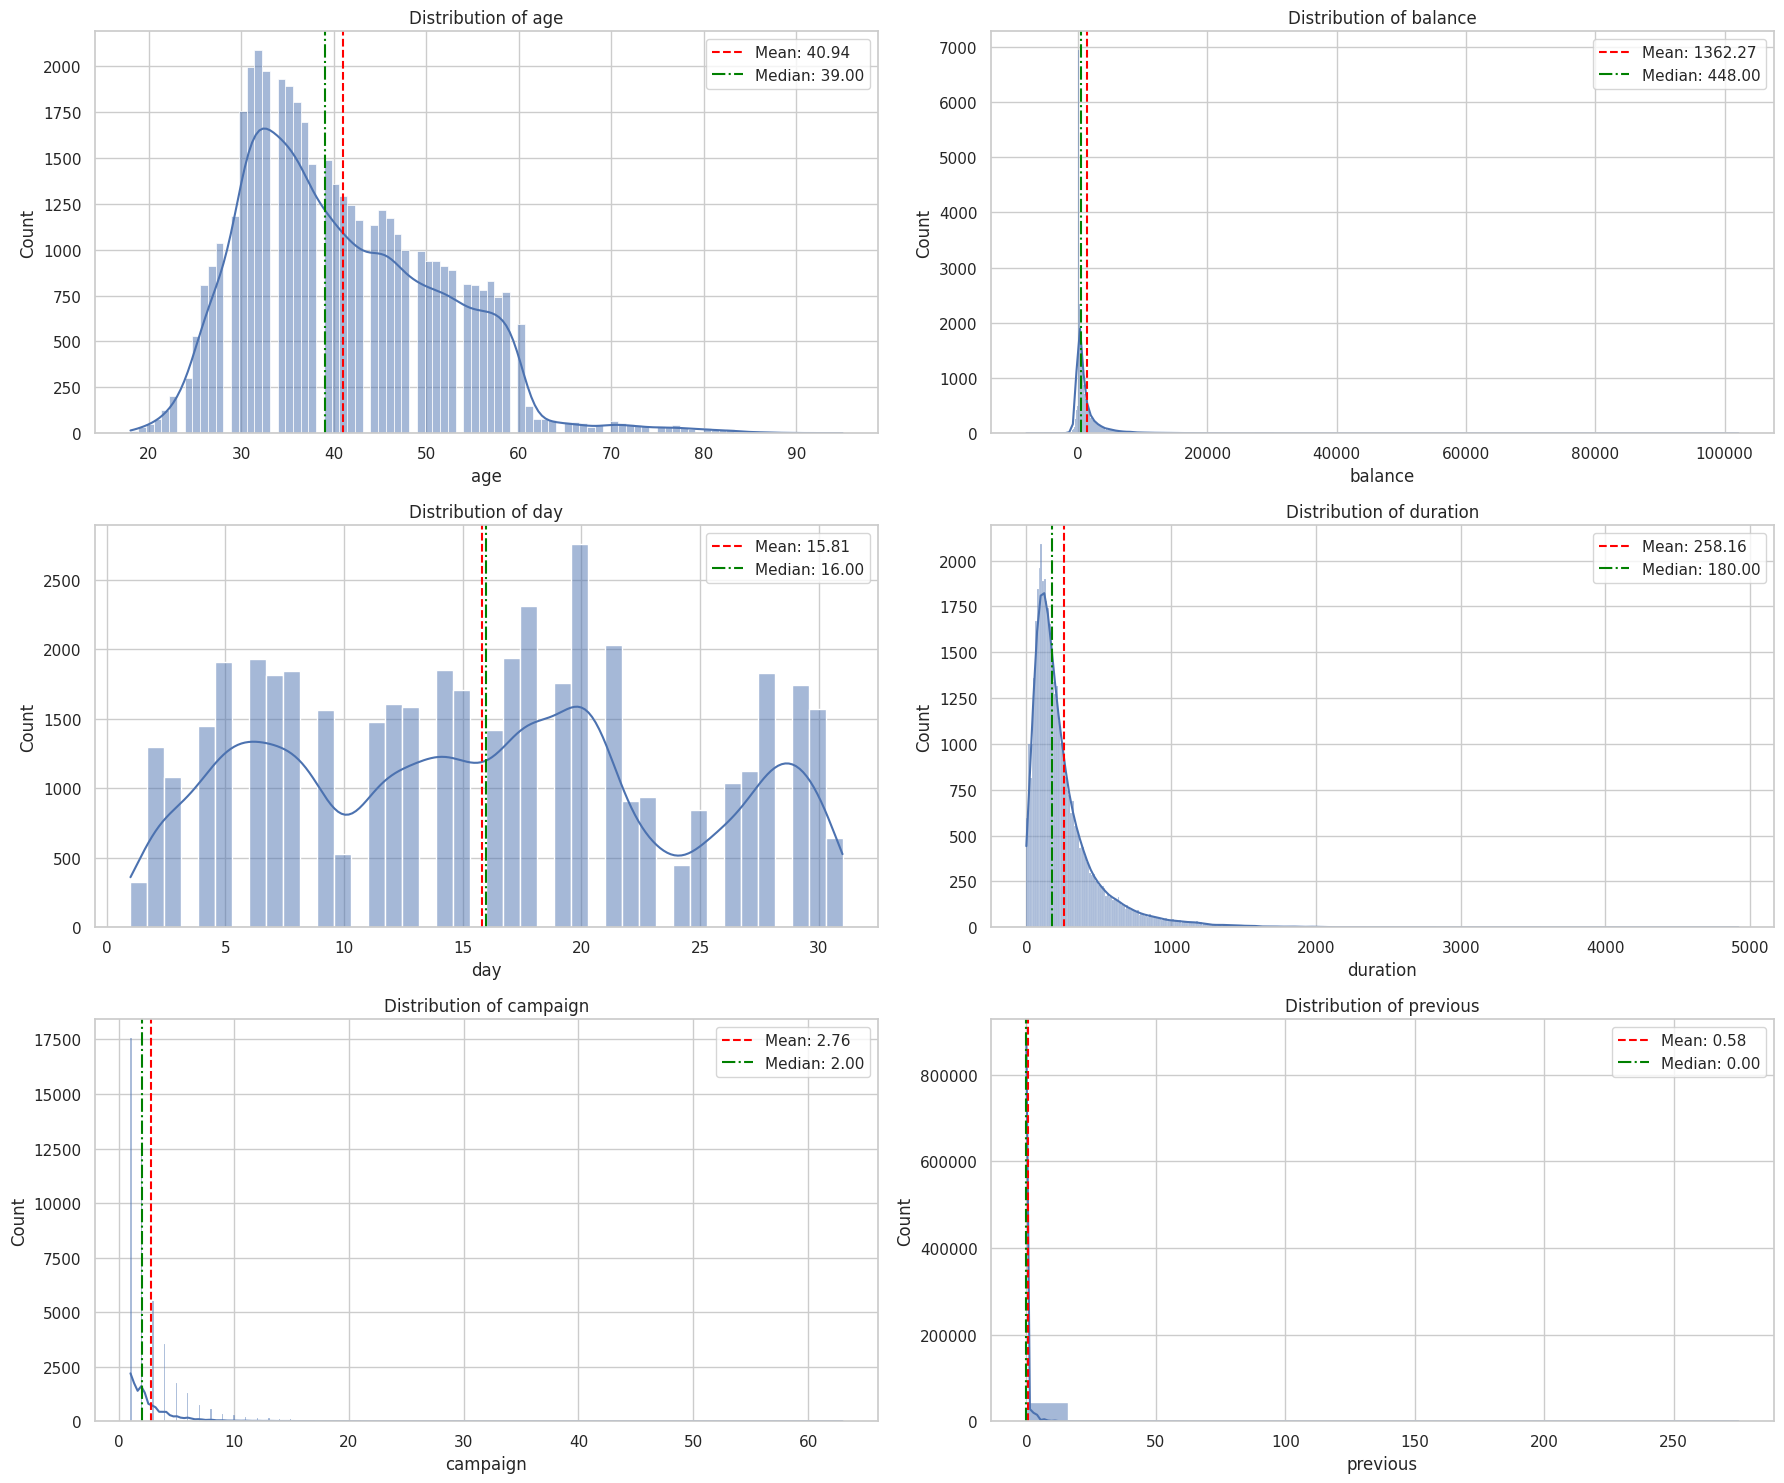

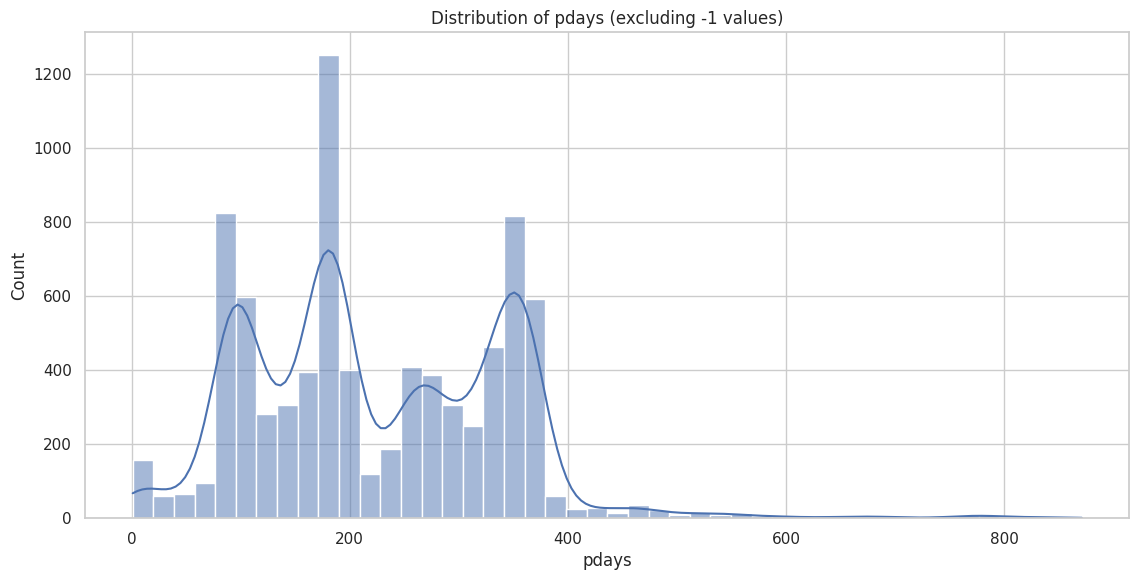

Number of records with pdays=-1 (no previous contact): 36954
Percentage: 81.74%


In [ ]:
# Function to create histograms for numerical variables
def plot_numerical_histograms(df, numerical_cols):
    n_cols = 2
    n_rows = len(numerical_cols) // n_cols + (1 if len(numerical_cols) % n_cols != 0 else 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

        # Add some statistics
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
        axes[i].legend()

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Get numerical columns excluding 'pdays' which has special meaning with -1
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']
plot_numerical_histograms(df, numerical_cols)

# Special handling for 'pdays' due to -1 values
plt.figure(figsize=(12, 6))
# Plot excluding -1 values
pdays_filtered = df[df['pdays'] != -1]['pdays']
sns.histplot(pdays_filtered, kde=True)
plt.title('Distribution of pdays (excluding -1 values)')
plt.xlabel('pdays')
plt.ylabel('Count')
plt.show()

# Print the count of -1 values in pdays
print(f"Number of records with pdays=-1 (no previous contact): {(df['pdays'] == -1).sum()}")
print(f"Percentage: {(df['pdays'] == -1).mean() * 100:.2f}%")


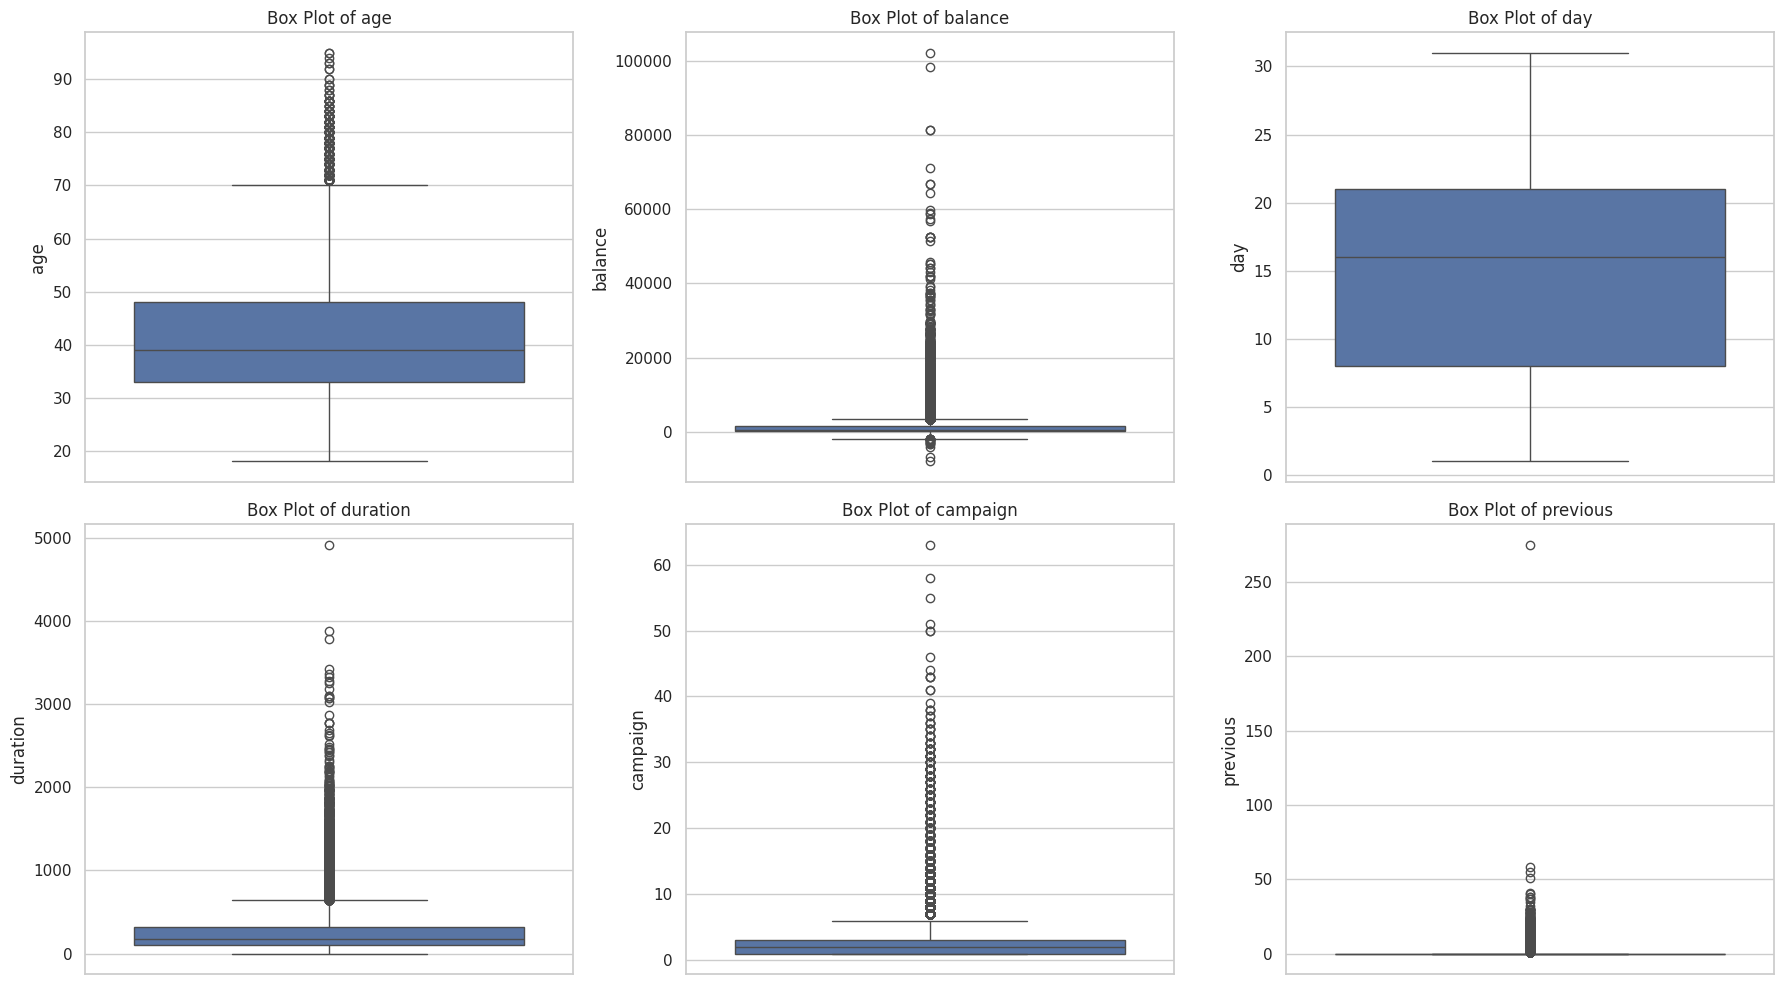

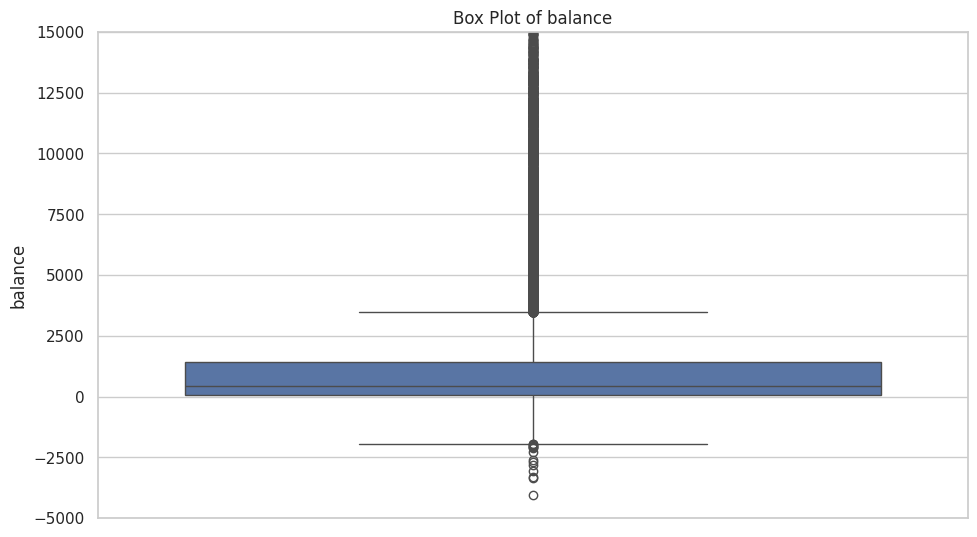

In [ ]:
# Create box plots for numerical variables
plt.figure(figsize=(18, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

# Zoomed box plot for balance (excluding extreme outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['balance'])
plt.title('Box Plot of balance')
plt.ylim(-5000, 15000)  # Adjust limits to see the main distribution better
plt.show()


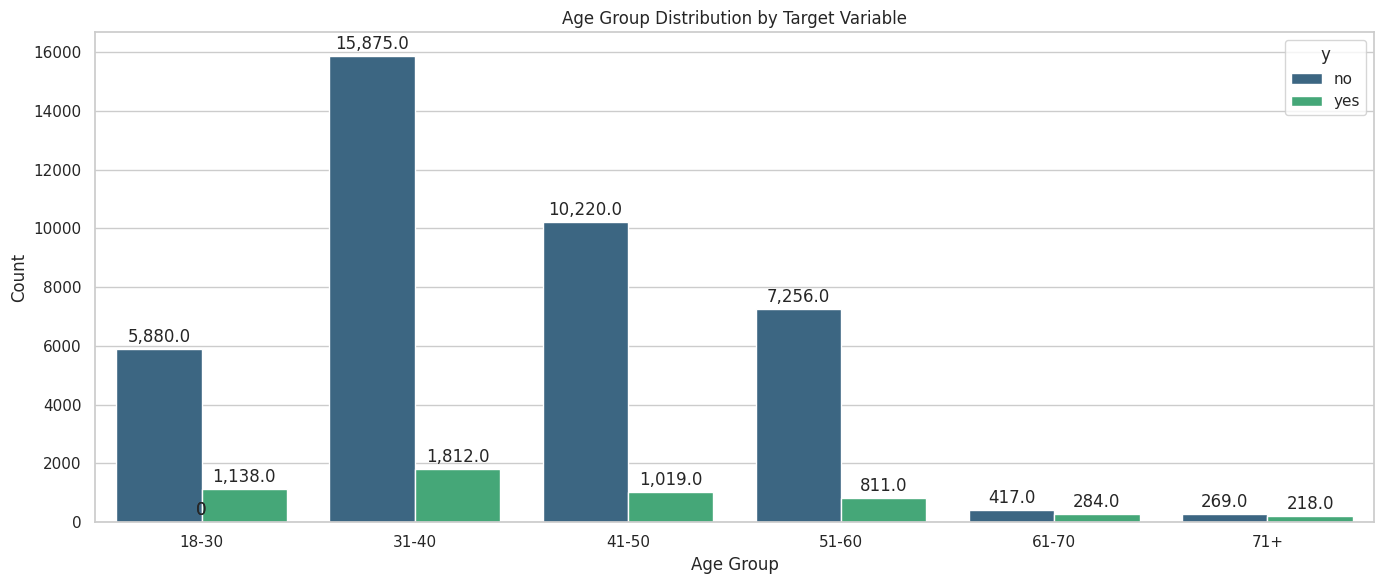

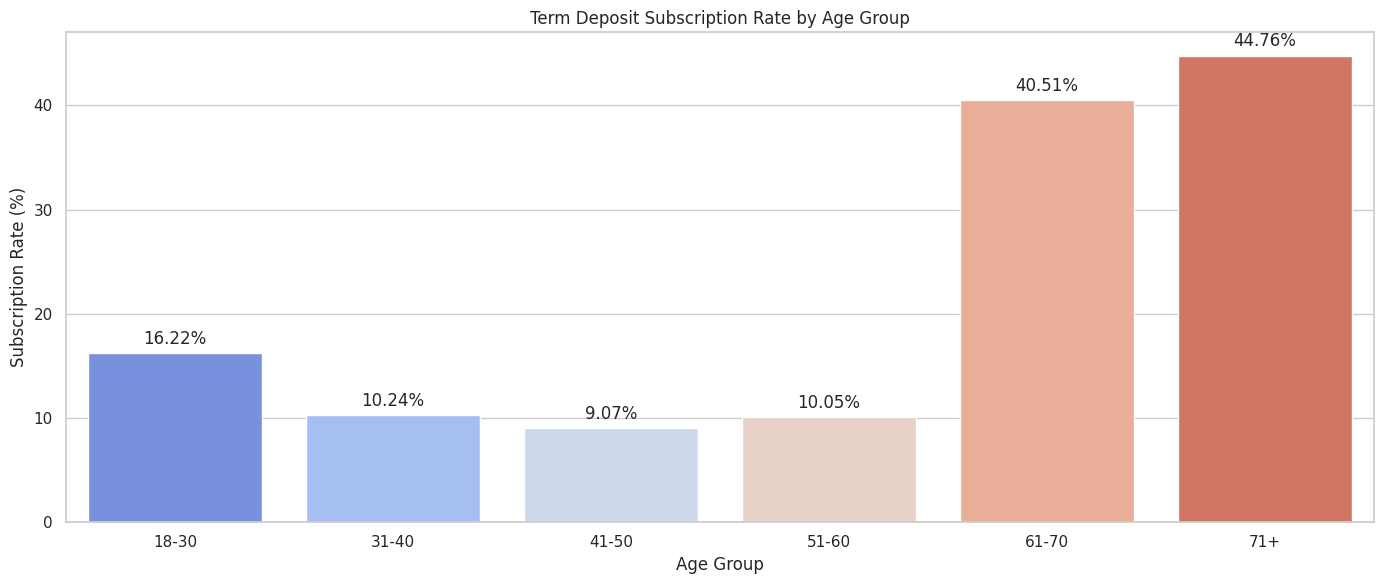

In [ ]:
# Create age groups for easier analysis
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70, 100],
                         labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71+'])

# Plot age distribution with target variable
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='age_group', hue='y', data=df, palette='viridis')
plt.title('Age Group Distribution by Target Variable')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Add percentages on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 100, f'{height:,}',
            ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# Calculate subscription rate by age group
age_subscription = df.groupby('age_group')['y'].apply(lambda x: (x == 'yes').mean() * 100).reset_index()
age_subscription.columns = ['age_group', 'subscription_rate_percent']

plt.figure(figsize=(14, 6))
sns.barplot(x='age_group', y='subscription_rate_percent', data=age_subscription, palette='coolwarm')
plt.title('Term Deposit Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (%)')
for i, v in enumerate(age_subscription['subscription_rate_percent']):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


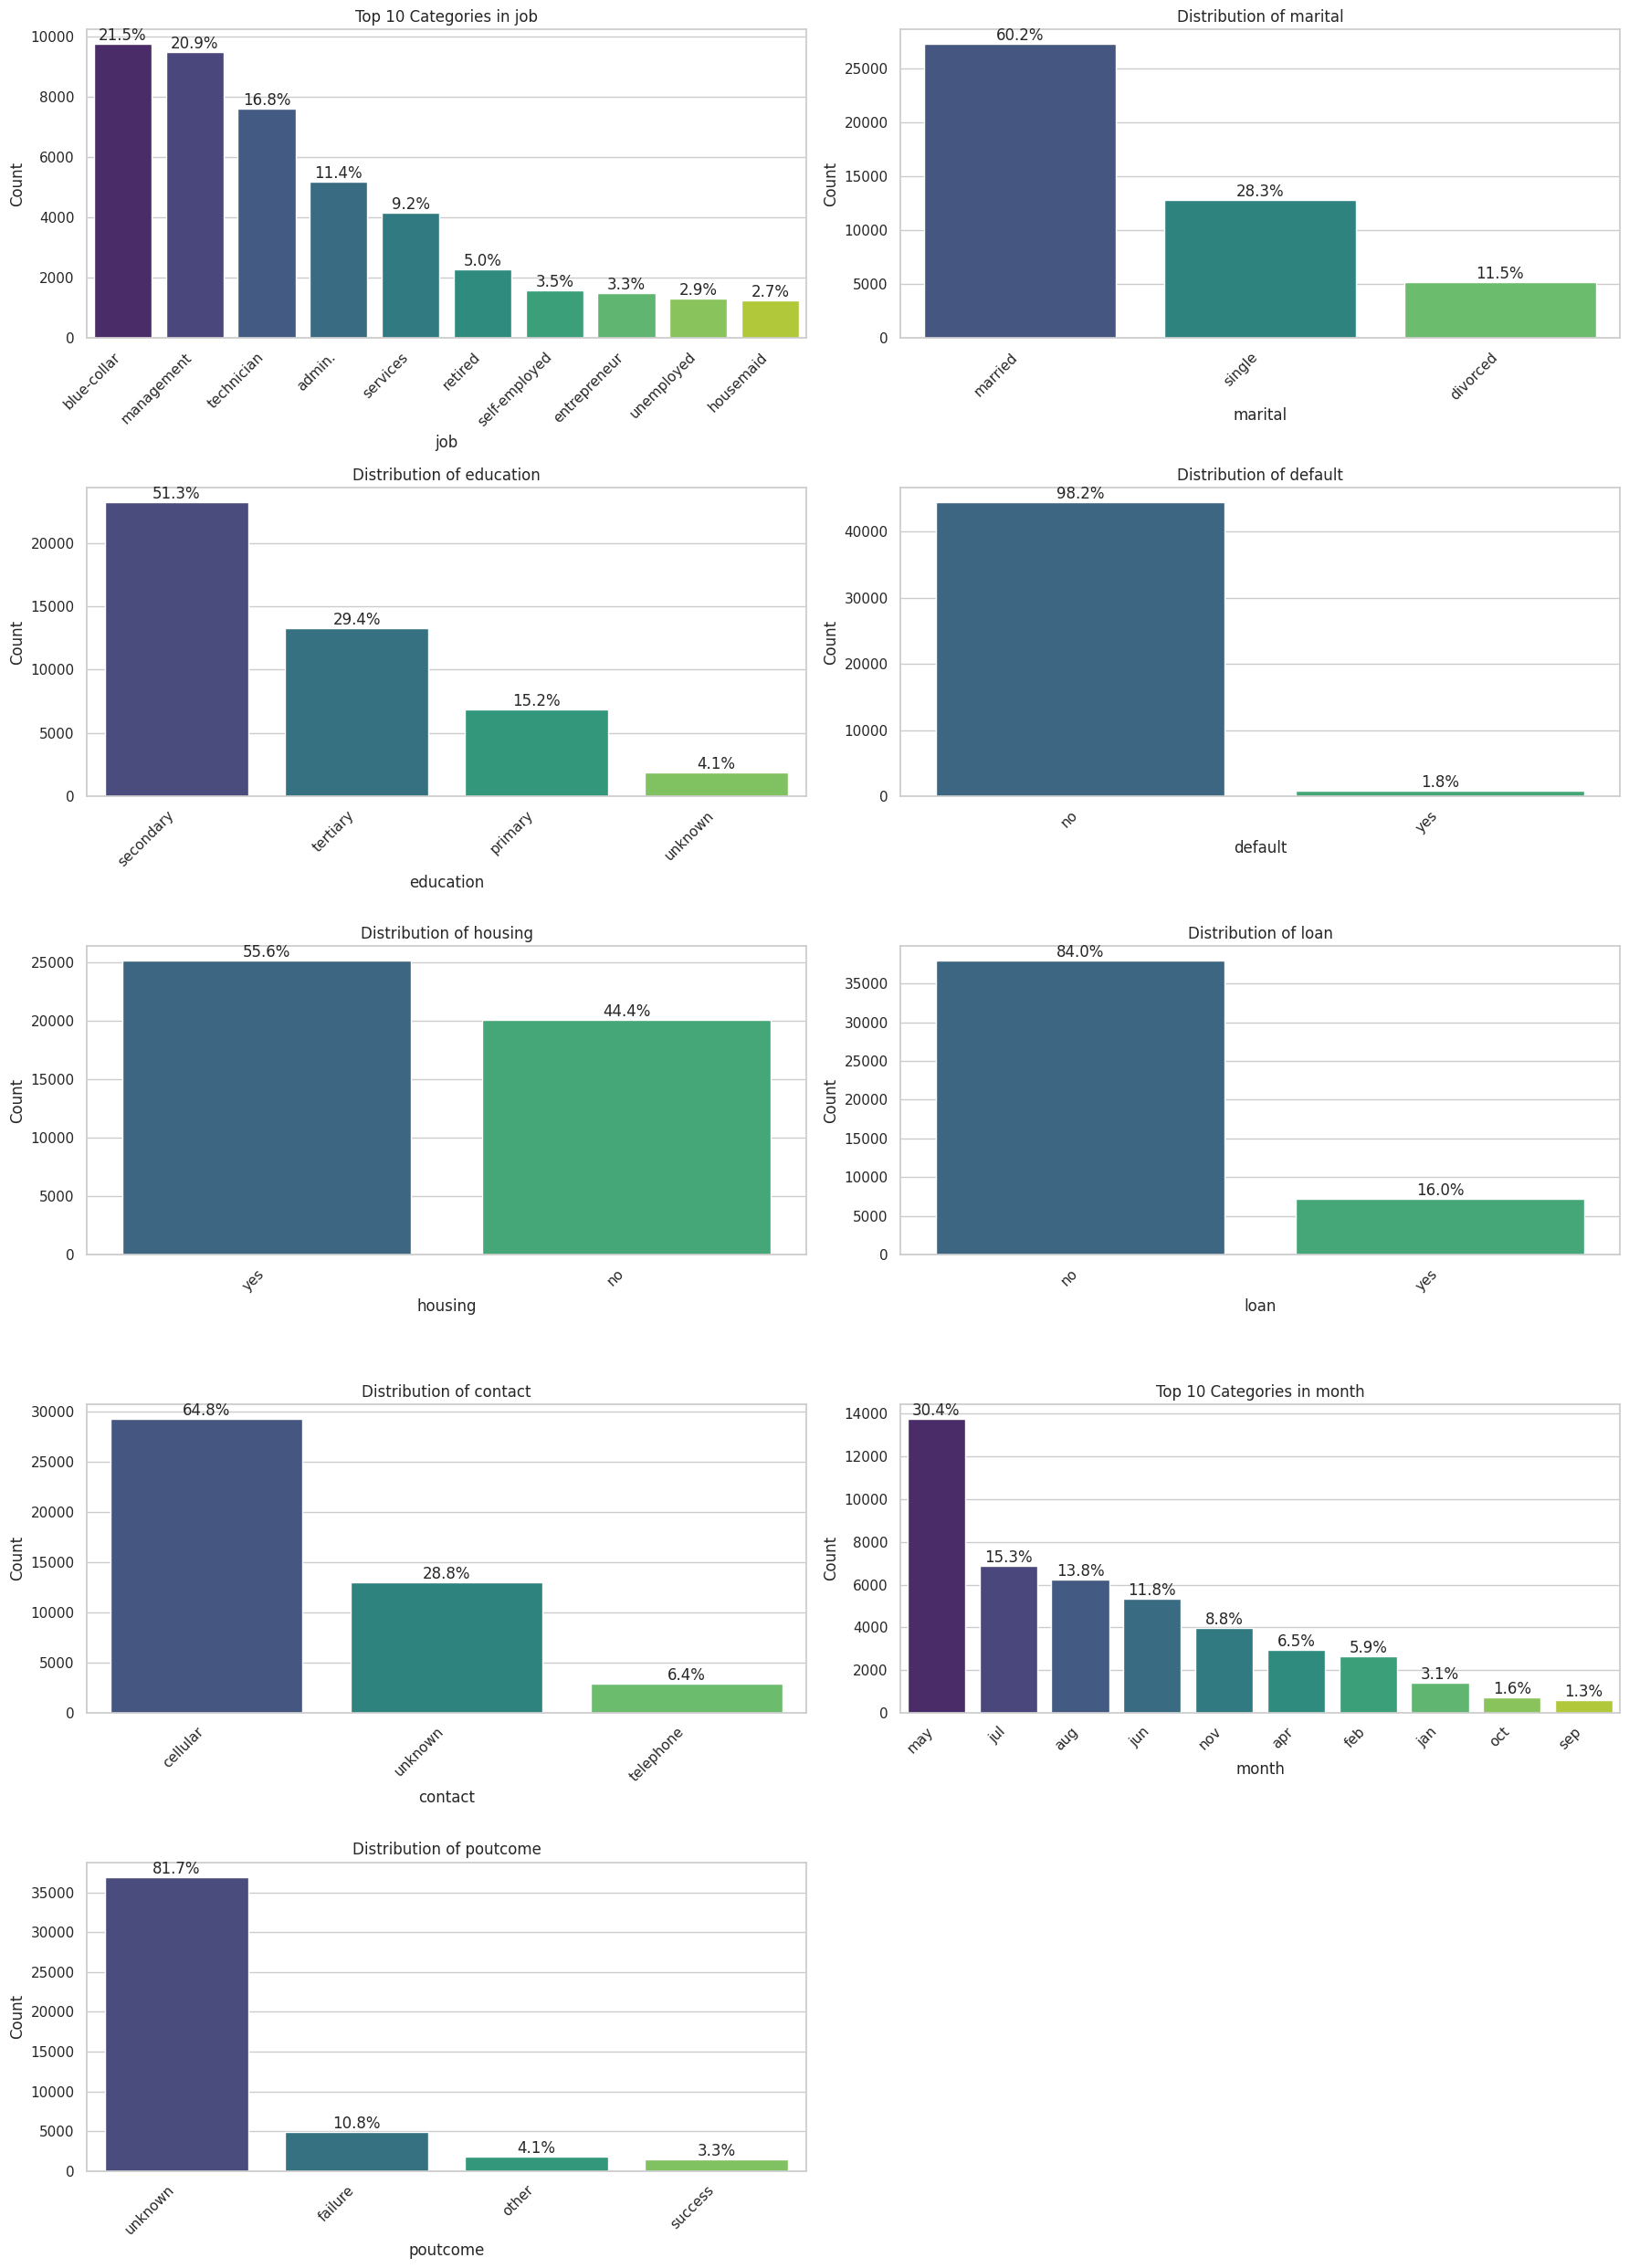

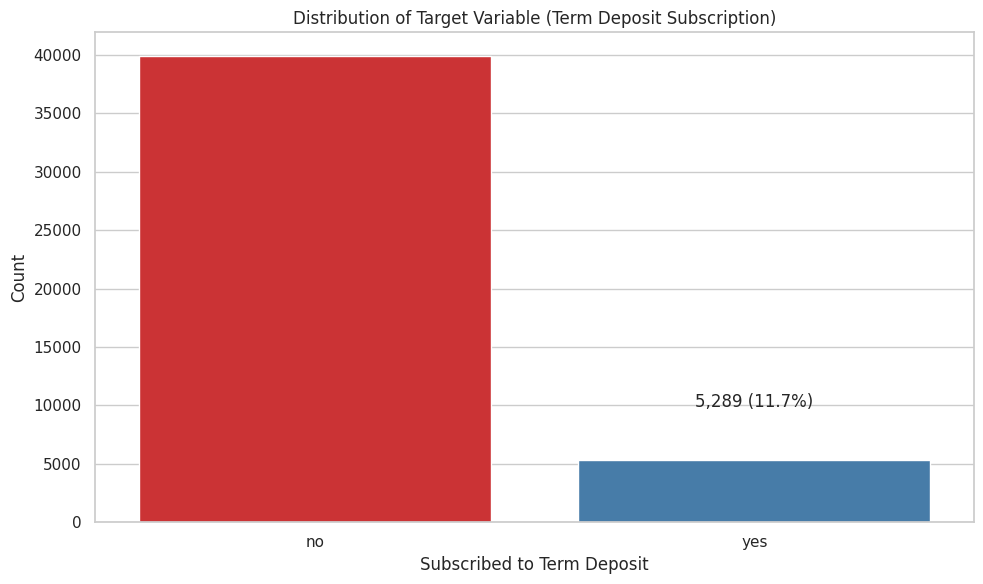

In [ ]:
# Function to create bar plots for categorical variables
def plot_categorical_bars(df, categorical_cols):
    n_cols = 2
    n_rows = len(categorical_cols) // n_cols + (1 if len(categorical_cols) % n_cols != 0 else 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        value_counts = df[col].value_counts().sort_values(ascending=False)

        # If too many categories, limit to top 10
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)
            axes[i].set_title(f'Top 10 Categories in {col}')
        else:
            axes[i].set_title(f'Distribution of {col}')

        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='viridis')

        # Add percentages on top of bars
        total = len(df)
        for j, p in enumerate(axes[i].patches):
            percentage = 100 * p.get_height() / total
            axes[i].annotate(f'{percentage:.1f}%',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', rotation=0)

        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Categorical columns excluding the target
cat_cols = [col for col in categorical_cols if col != 'y']
plot_categorical_bars(df, cat_cols)

# Target variable distribution
plt.figure(figsize=(10, 6))
target_counts = df['y'].value_counts()
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette='Set1')
plt.title('Distribution of Target Variable (Term Deposit Subscription)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')

# Add counts and percentages
total = len(df)
for i, p in enumerate(ax.patches):
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{int(p.get_height()):,} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center')

plt.tight_layout()
plt.show()


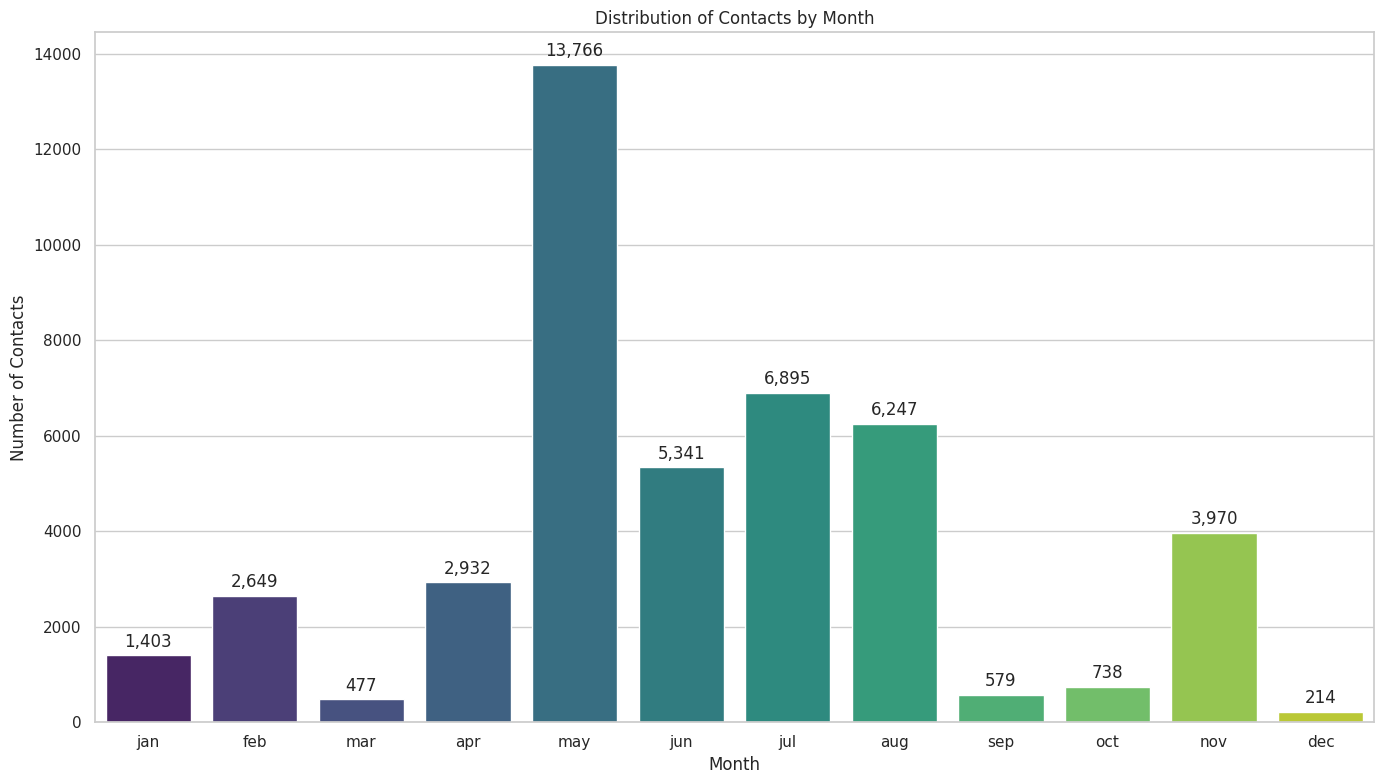

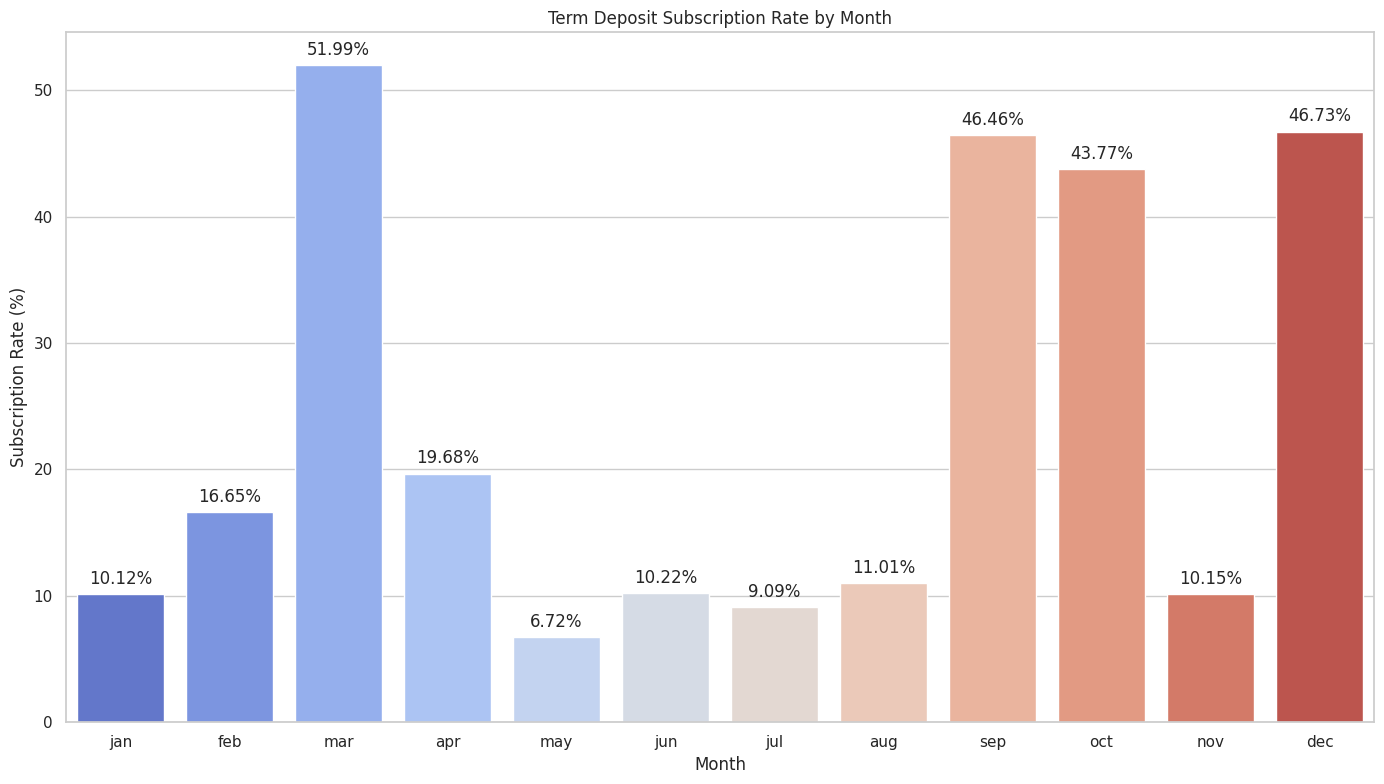

In [ ]:
# Define month order for proper sorting
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Plot contact distribution by month
plt.figure(figsize=(14, 8))
monthly_counts = df['month'].value_counts().sort_index()
ax = sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('Distribution of Contacts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')

# Add counts on top of bars
for i, v in enumerate(monthly_counts.values):
    ax.text(i, v + 100, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot subscription rate by month
monthly_subscription = df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean() * 100).reset_index()
monthly_subscription.columns = ['month', 'subscription_rate_percent']

plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='subscription_rate_percent', data=monthly_subscription, palette='coolwarm')
plt.title('Term Deposit Subscription Rate by Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate (%)')
for i, v in enumerate(monthly_subscription['subscription_rate_percent']):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


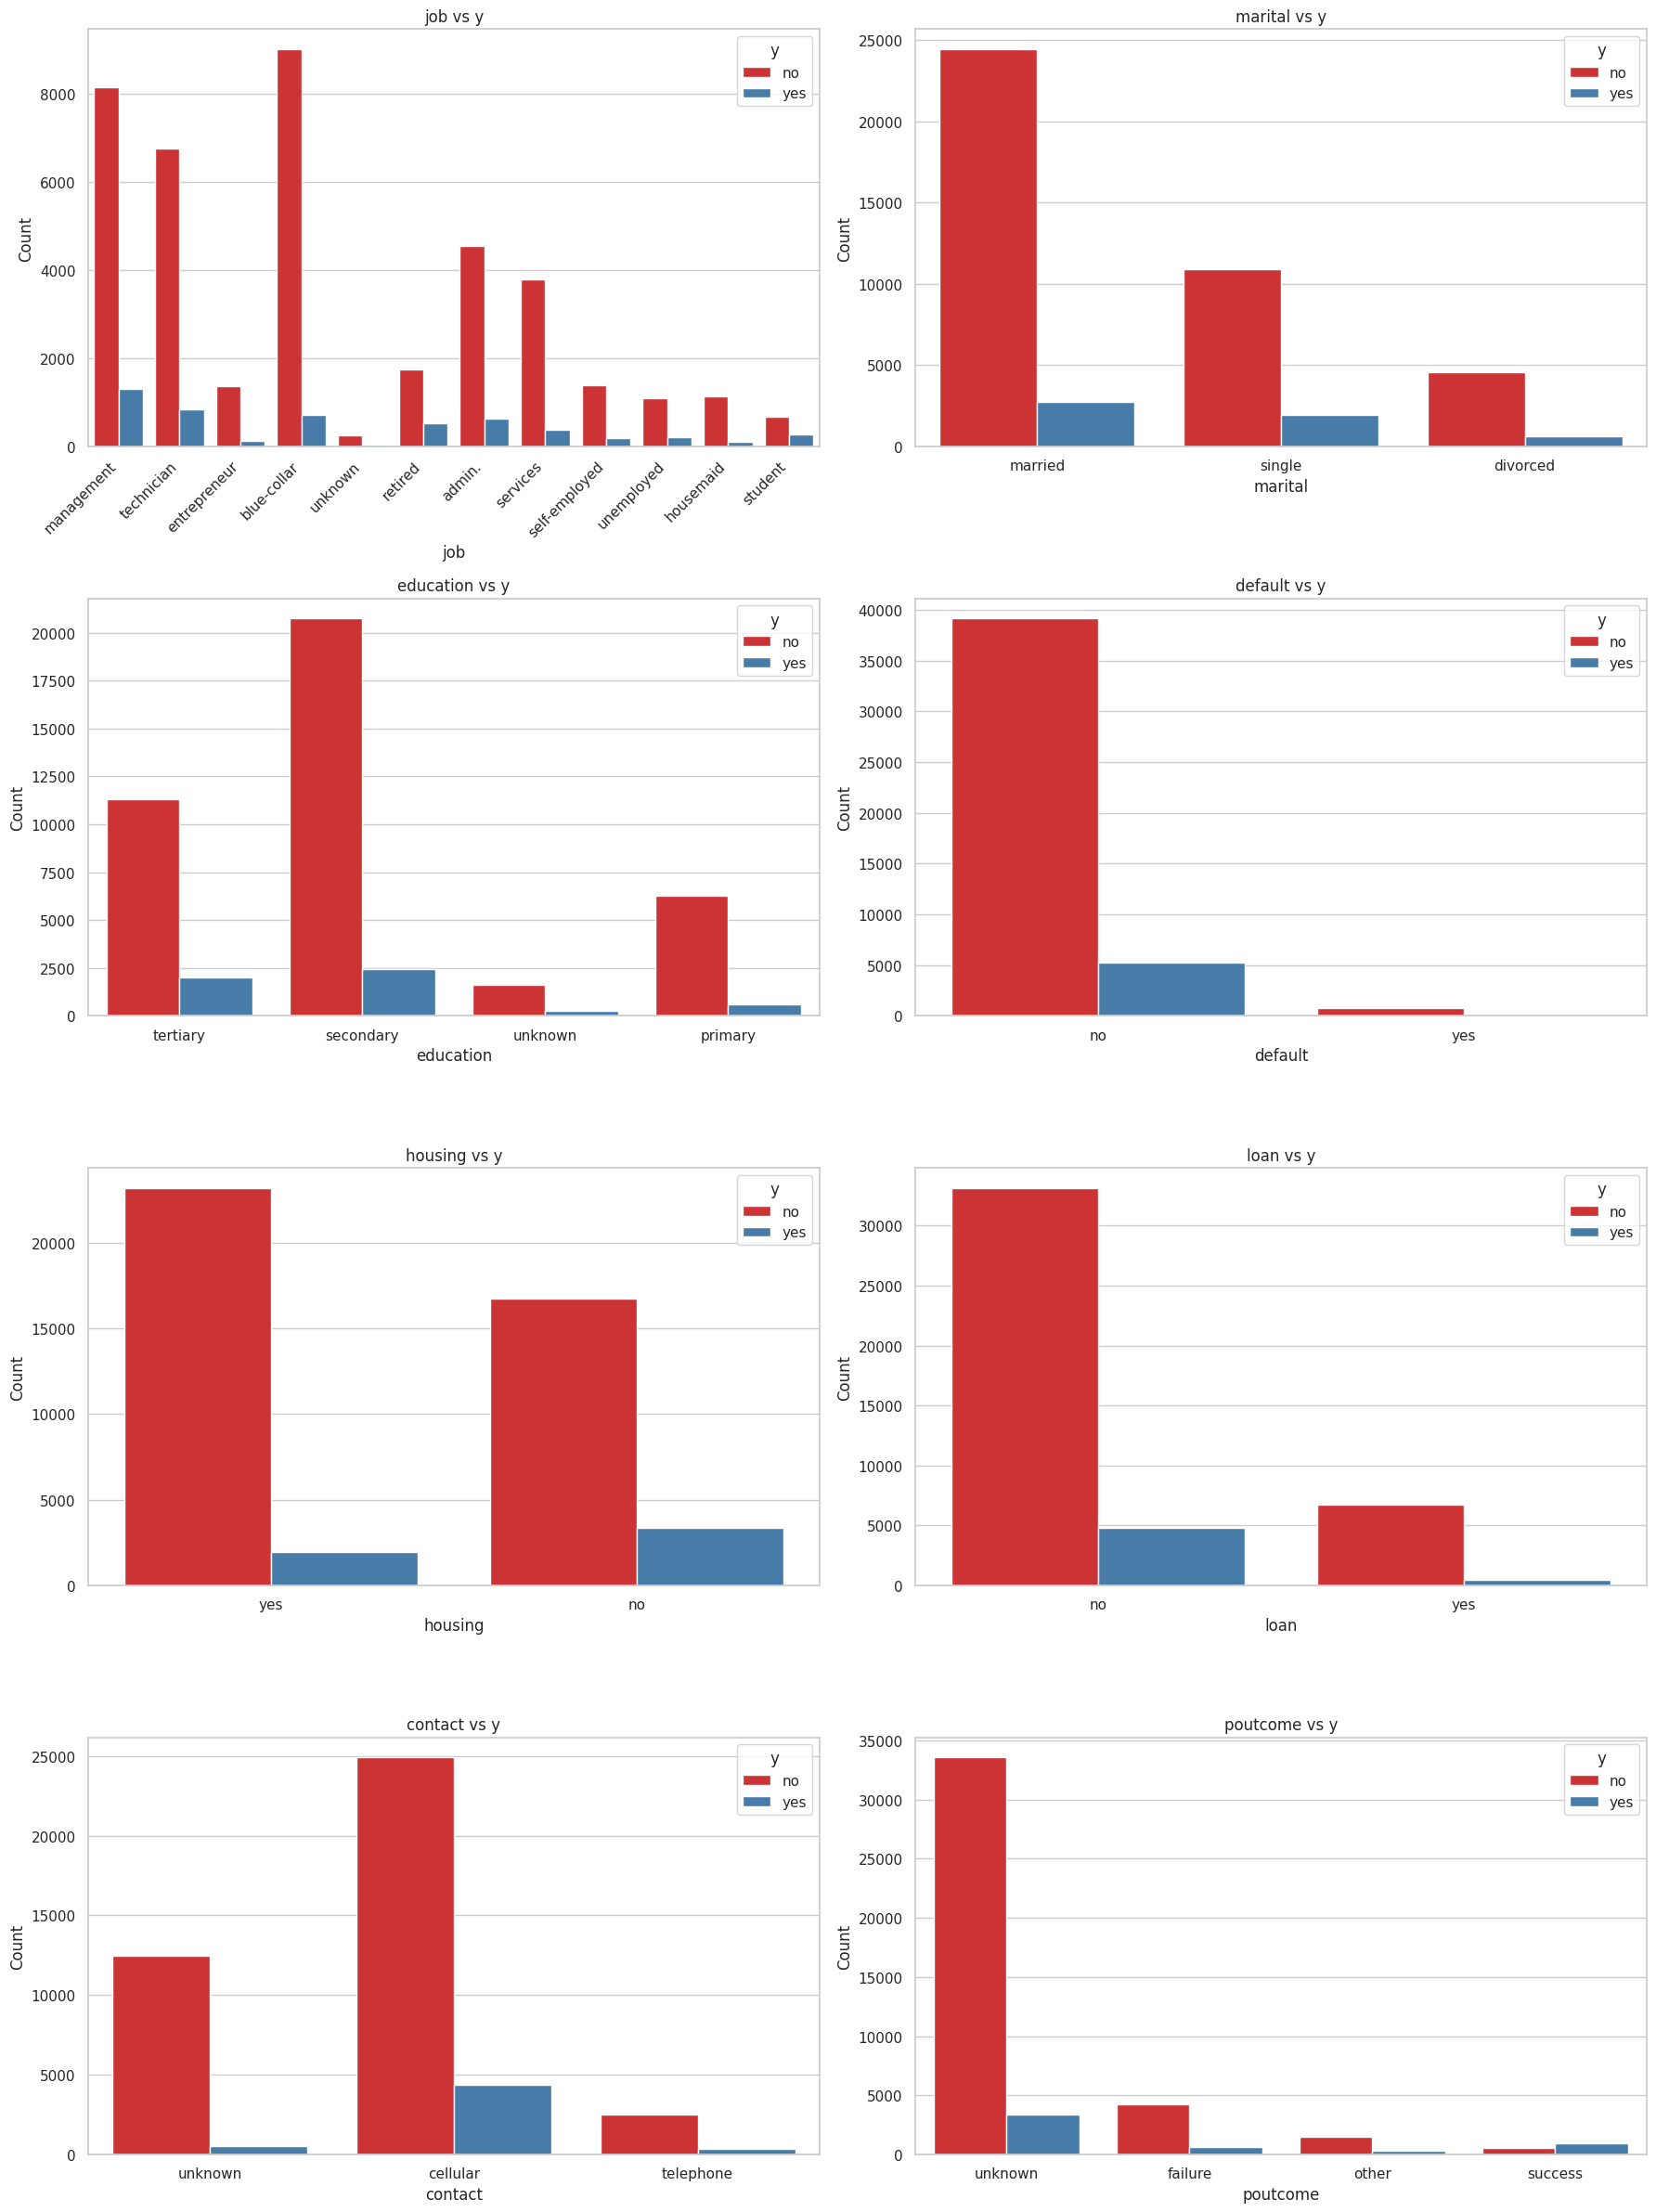

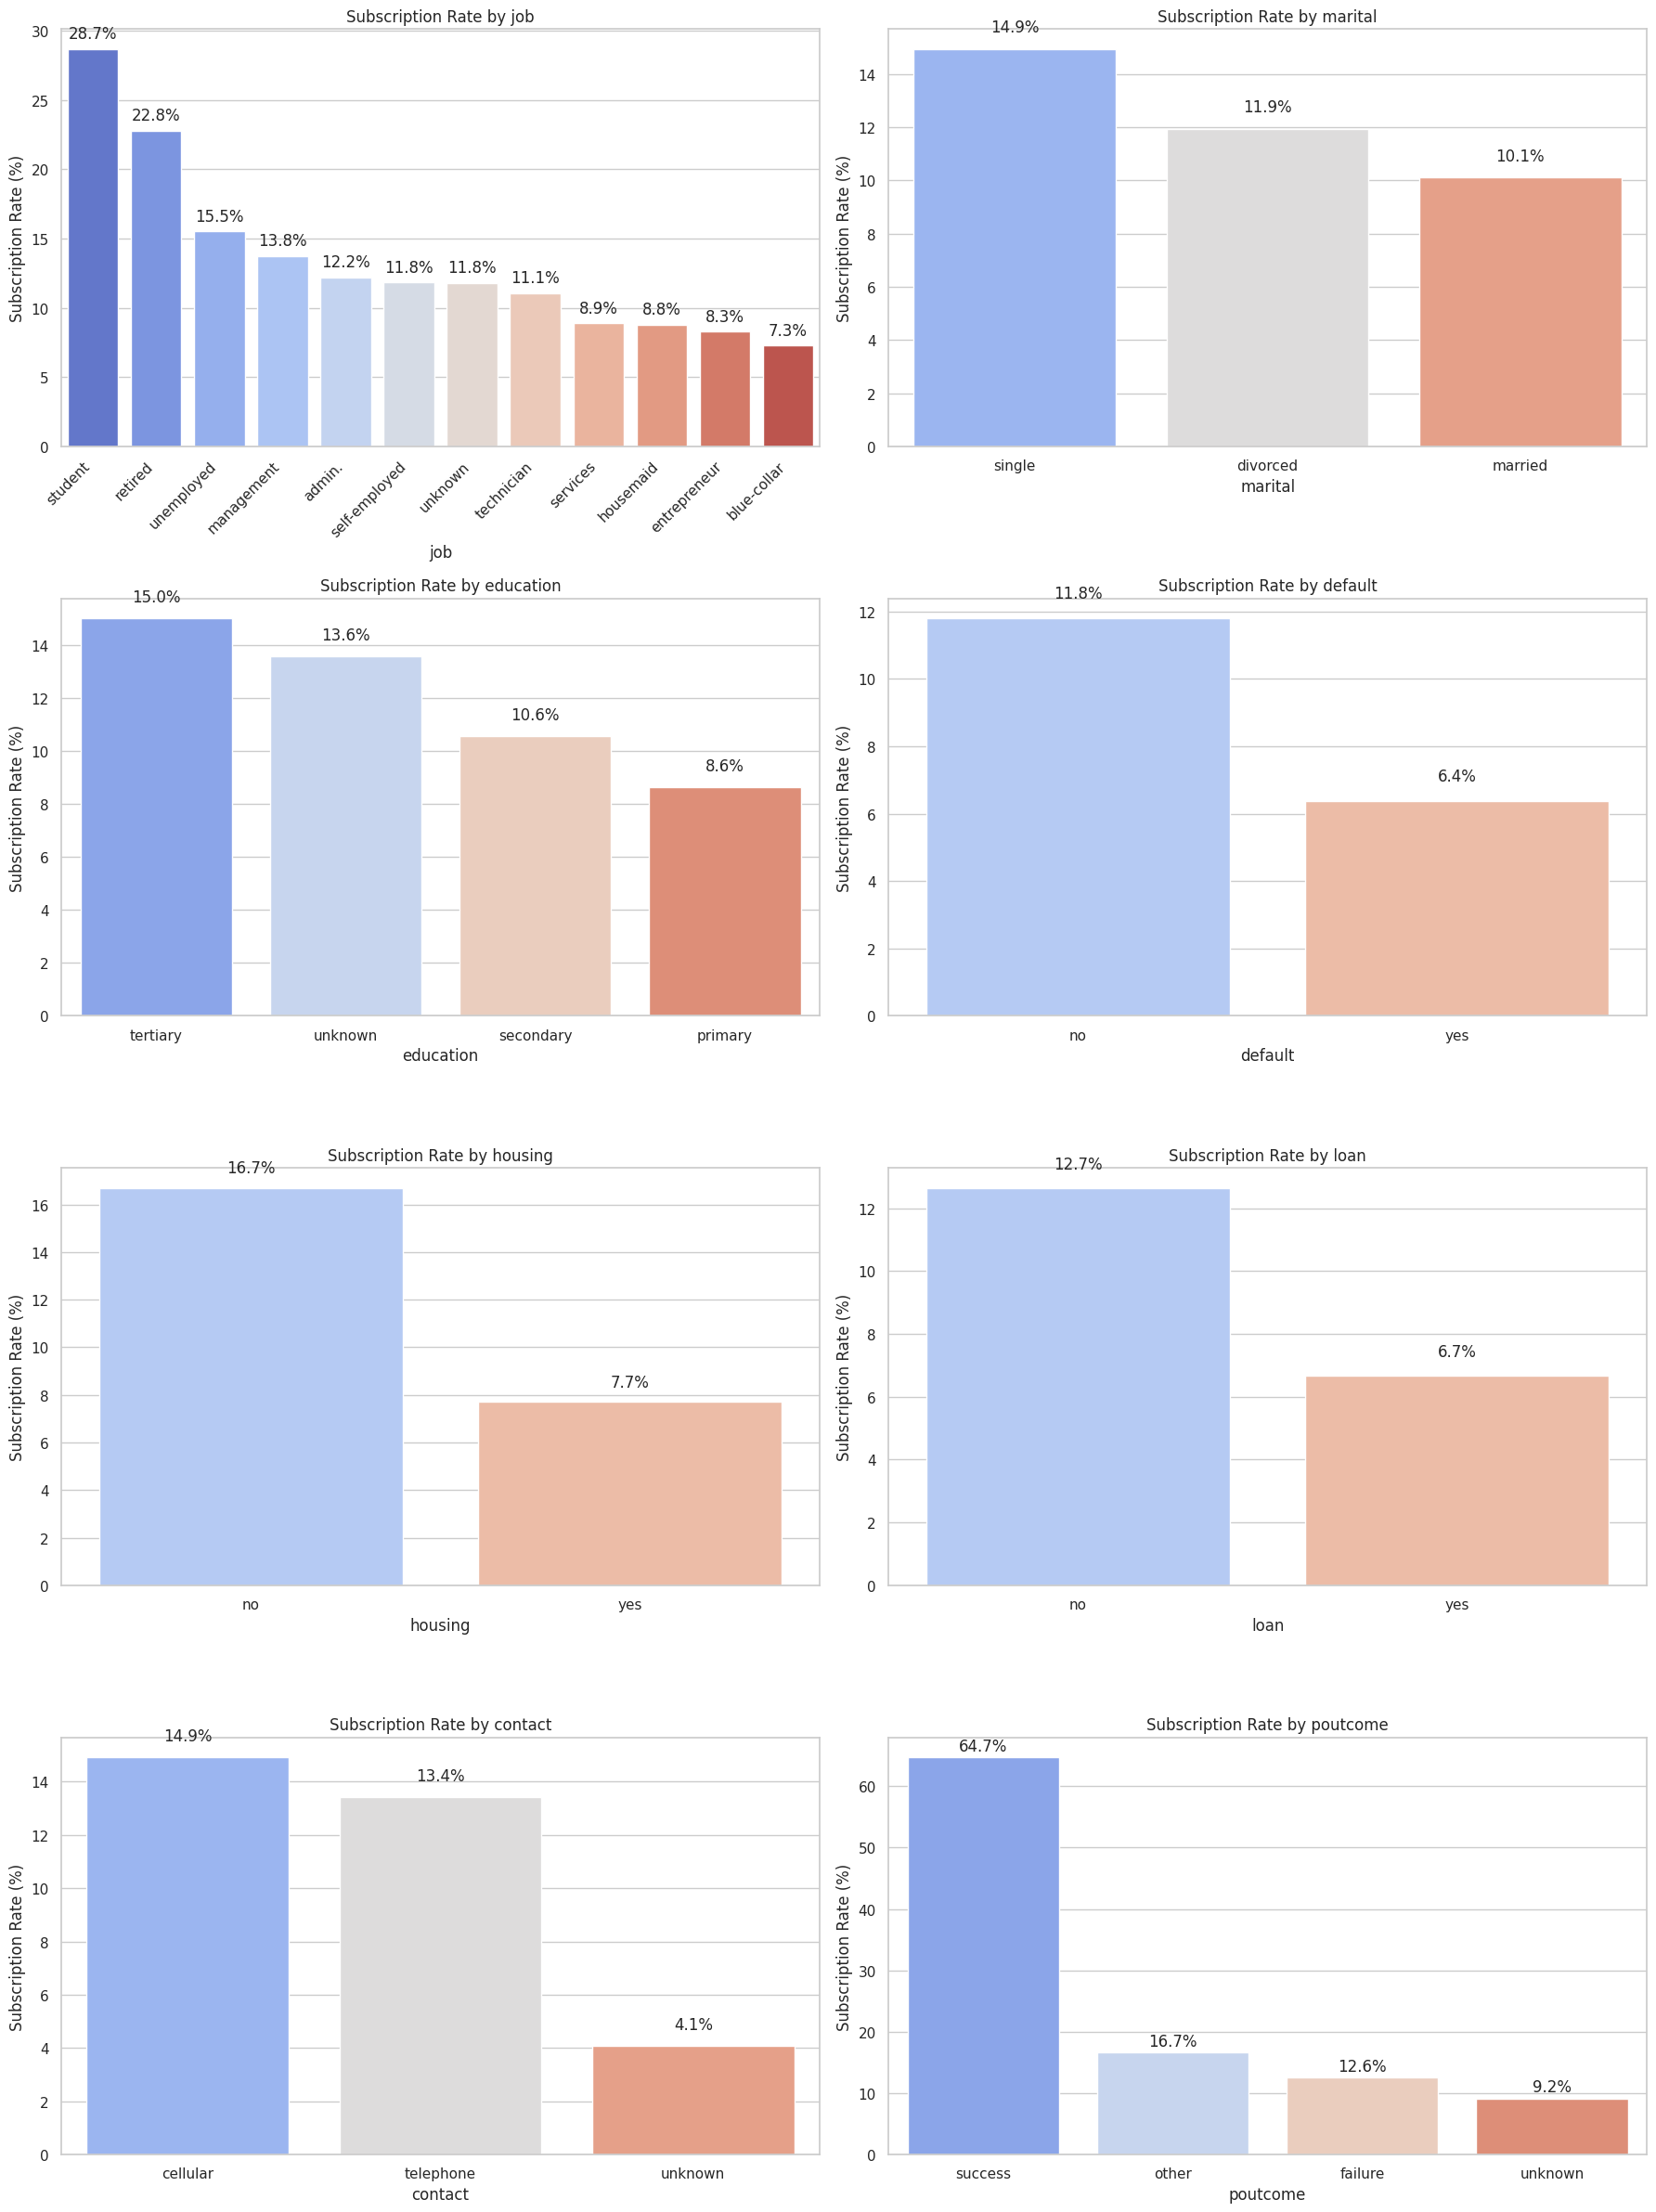

In [ ]:
# Function to analyze categorical variables against the target
def plot_categorical_by_target(df, cat_cols, target='y'):
    n_cols = 2
    n_rows = len(cat_cols) // n_cols + (1 if len(cat_cols) % n_cols != 0 else 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        # Count plot
        sns.countplot(x=col, hue=target, data=df, ax=axes[i], palette='Set1')
        axes[i].set_title(f'{col} vs {target}')
        axes[i].set_ylabel('Count')

        # Rotate x labels if needed
        if df[col].nunique() > 5:
            plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Now plot the subscription rates for each category
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        # Calculate subscription rate for each category
        subscription_rate = df.groupby(col)[target].apply(lambda x: (x == 'yes').mean() * 100).reset_index()
        subscription_rate.columns = [col, 'subscription_rate_percent']

        # Sort by subscription rate for better visualization
        subscription_rate = subscription_rate.sort_values('subscription_rate_percent', ascending=False)

        # Bar plot
        sns.barplot(x=col, y='subscription_rate_percent', data=subscription_rate, ax=axes[i], palette='coolwarm')
        axes[i].set_title(f'Subscription Rate by {col}')
        axes[i].set_ylabel('Subscription Rate (%)')

        # Add percentage labels
        for j, p in enumerate(axes[i].patches):
            axes[i].annotate(f'{p.get_height():.1f}%',
                            (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                            ha='center', va='bottom')

        # Rotate x labels if needed
        if subscription_rate[col].nunique() > 5:
            plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Plot categorical variables against the target
categorical_cols_subset = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
plot_categorical_by_target(df, categorical_cols_subset)


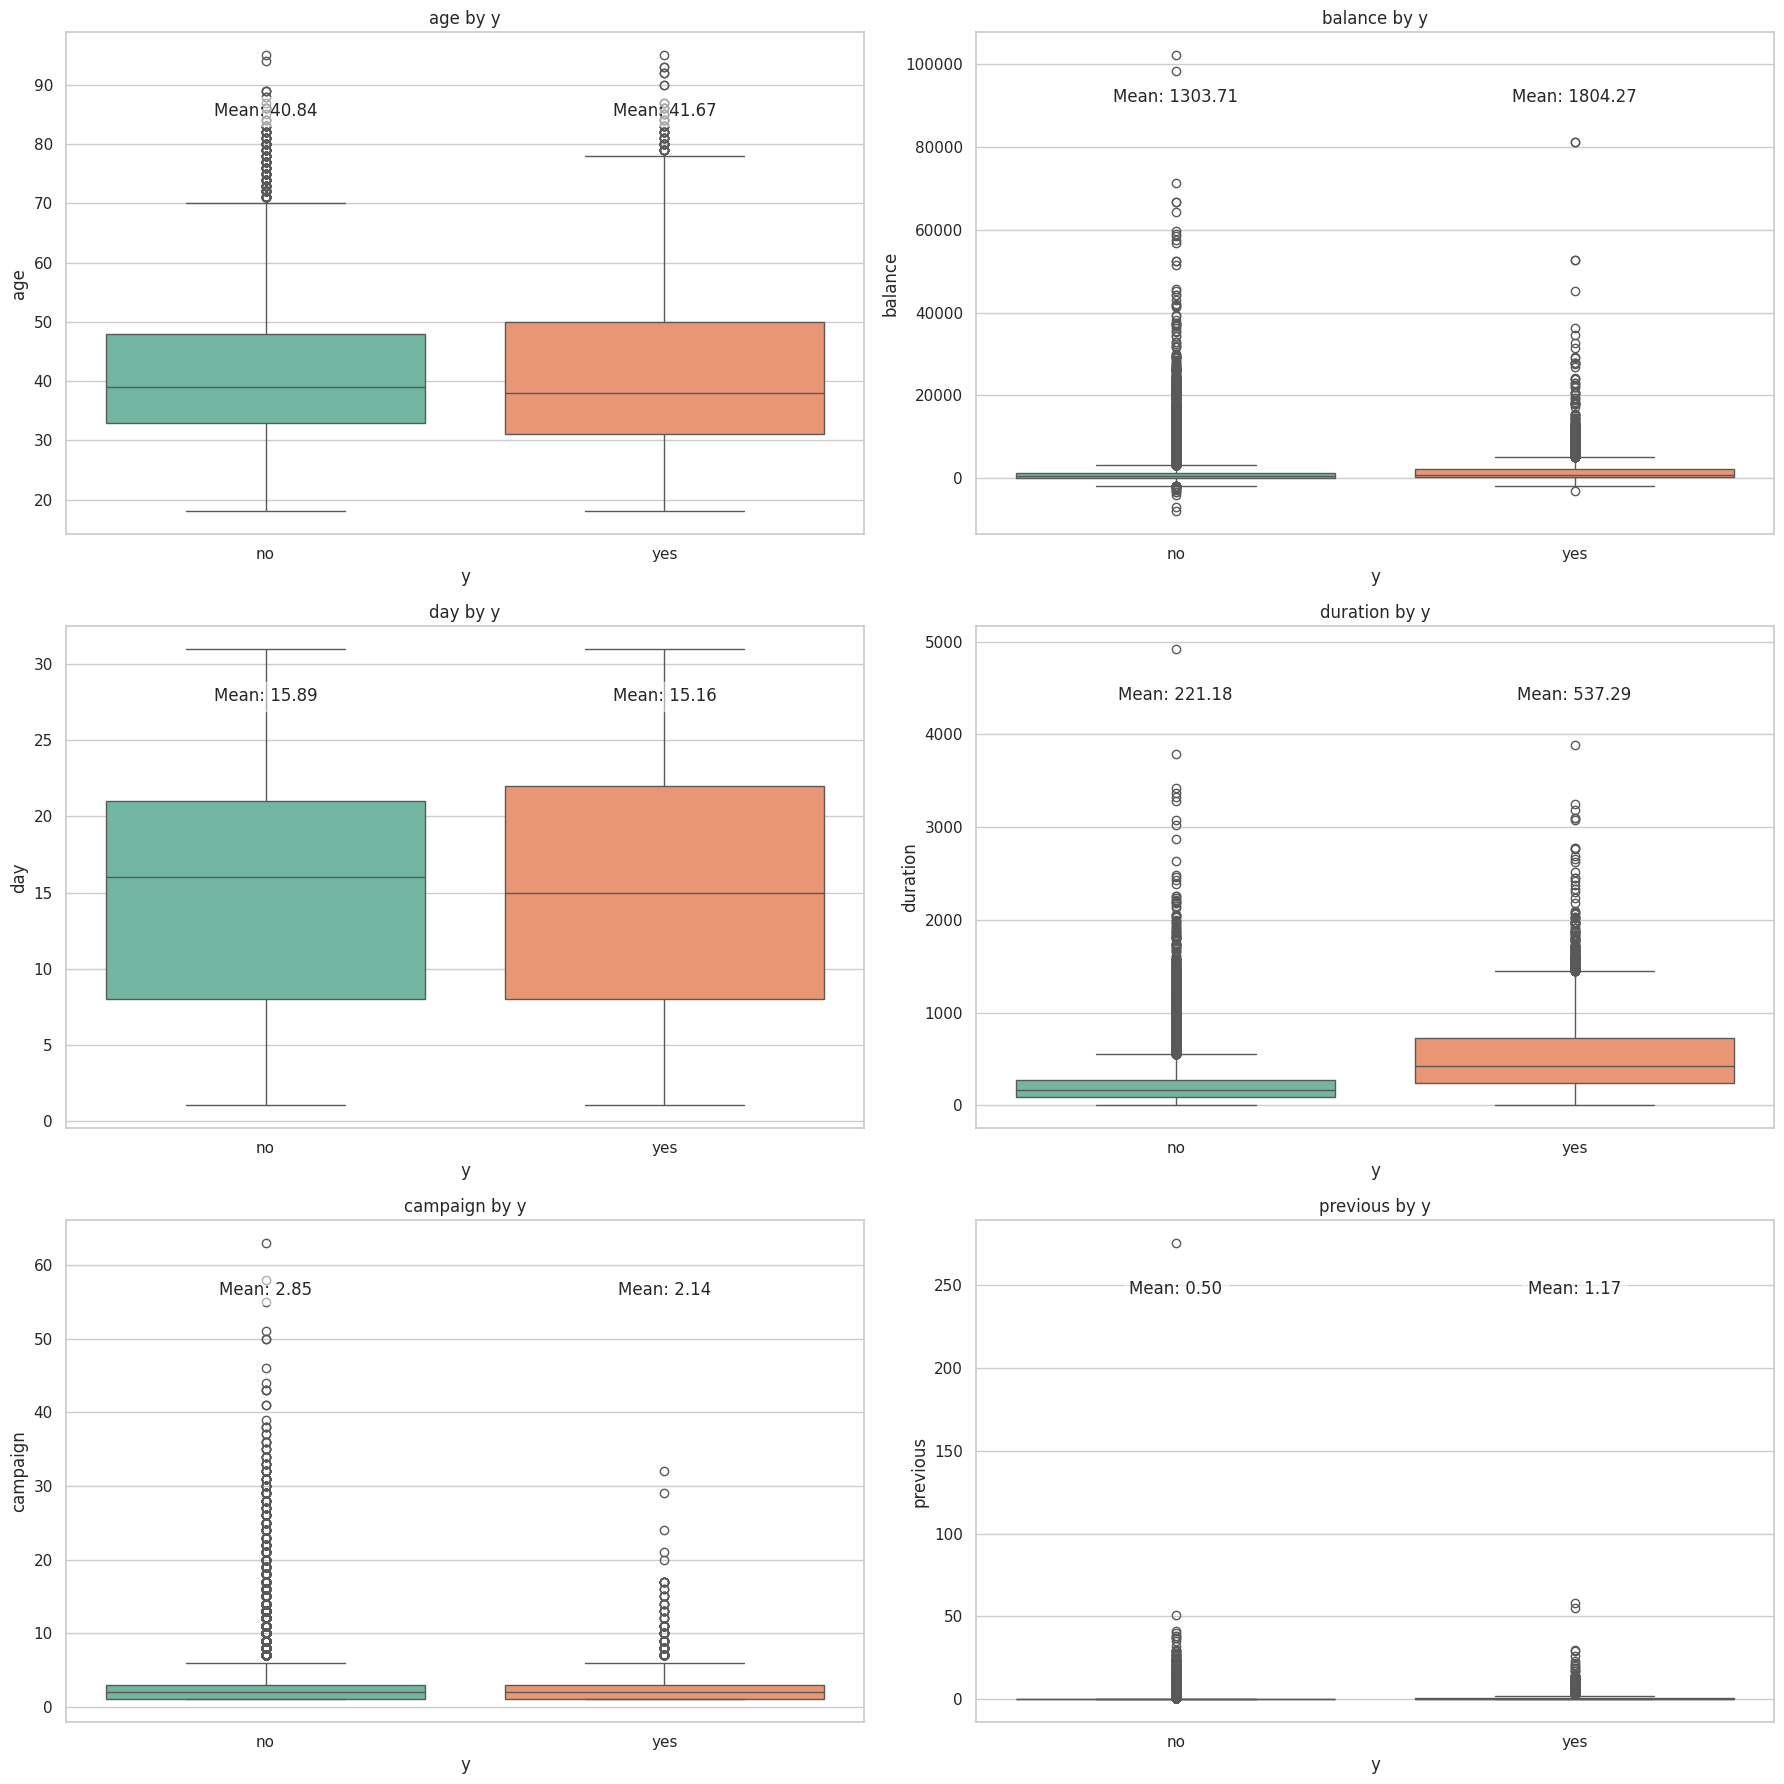

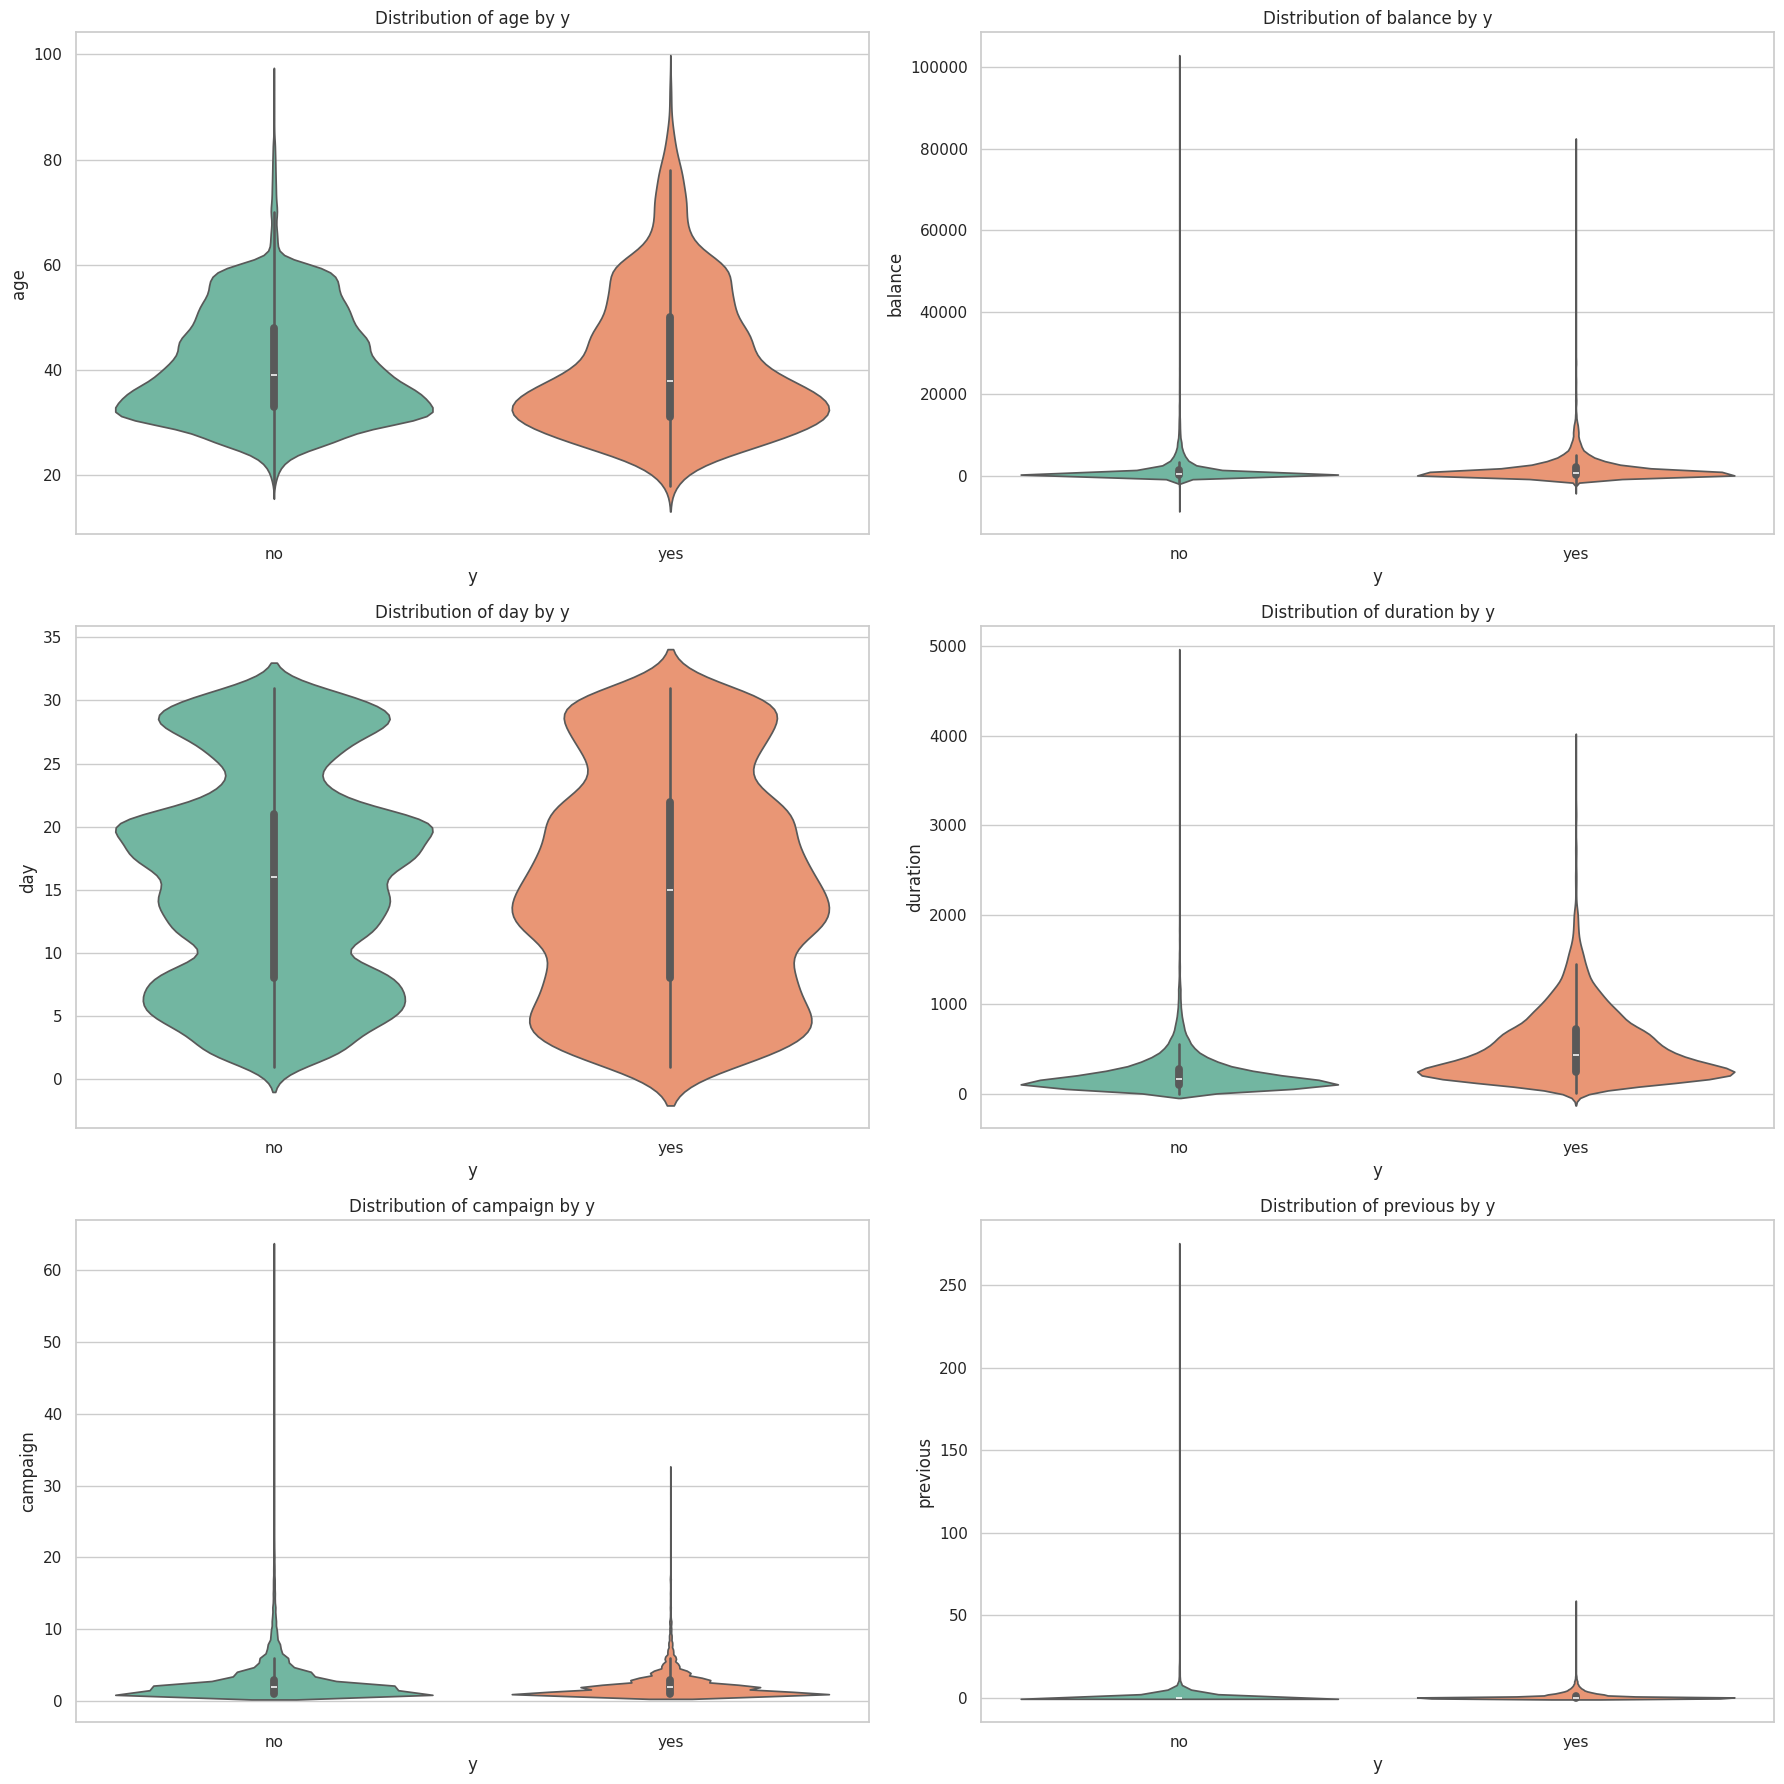

In [ ]:
# Function to create box plots for numerical variables by target
def plot_numerical_by_target(df, numerical_cols, target='y'):
    n_cols = 2
    n_rows = len(numerical_cols) // n_cols + (1 if len(numerical_cols) % n_cols != 0 else 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        # Create box plot
        sns.boxplot(x=target, y=col, data=df, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{col} by {target}')

        # Add mean values as text
        means = df.groupby(target)[col].mean()
        for j, cat in enumerate(df[target].unique()):
            axes[i].text(j, df[col].max() * 0.9, f'Mean: {means[cat]:.2f}',
                        ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Violin plots for better distribution visualization
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        # Create violin plot
        sns.violinplot(x=target, y=col, data=df, ax=axes[i], palette='Set2')
        axes[i].set_title(f'Distribution of {col} by {target}')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Plot numerical variables against the target
plot_numerical_by_target(df, numerical_cols)


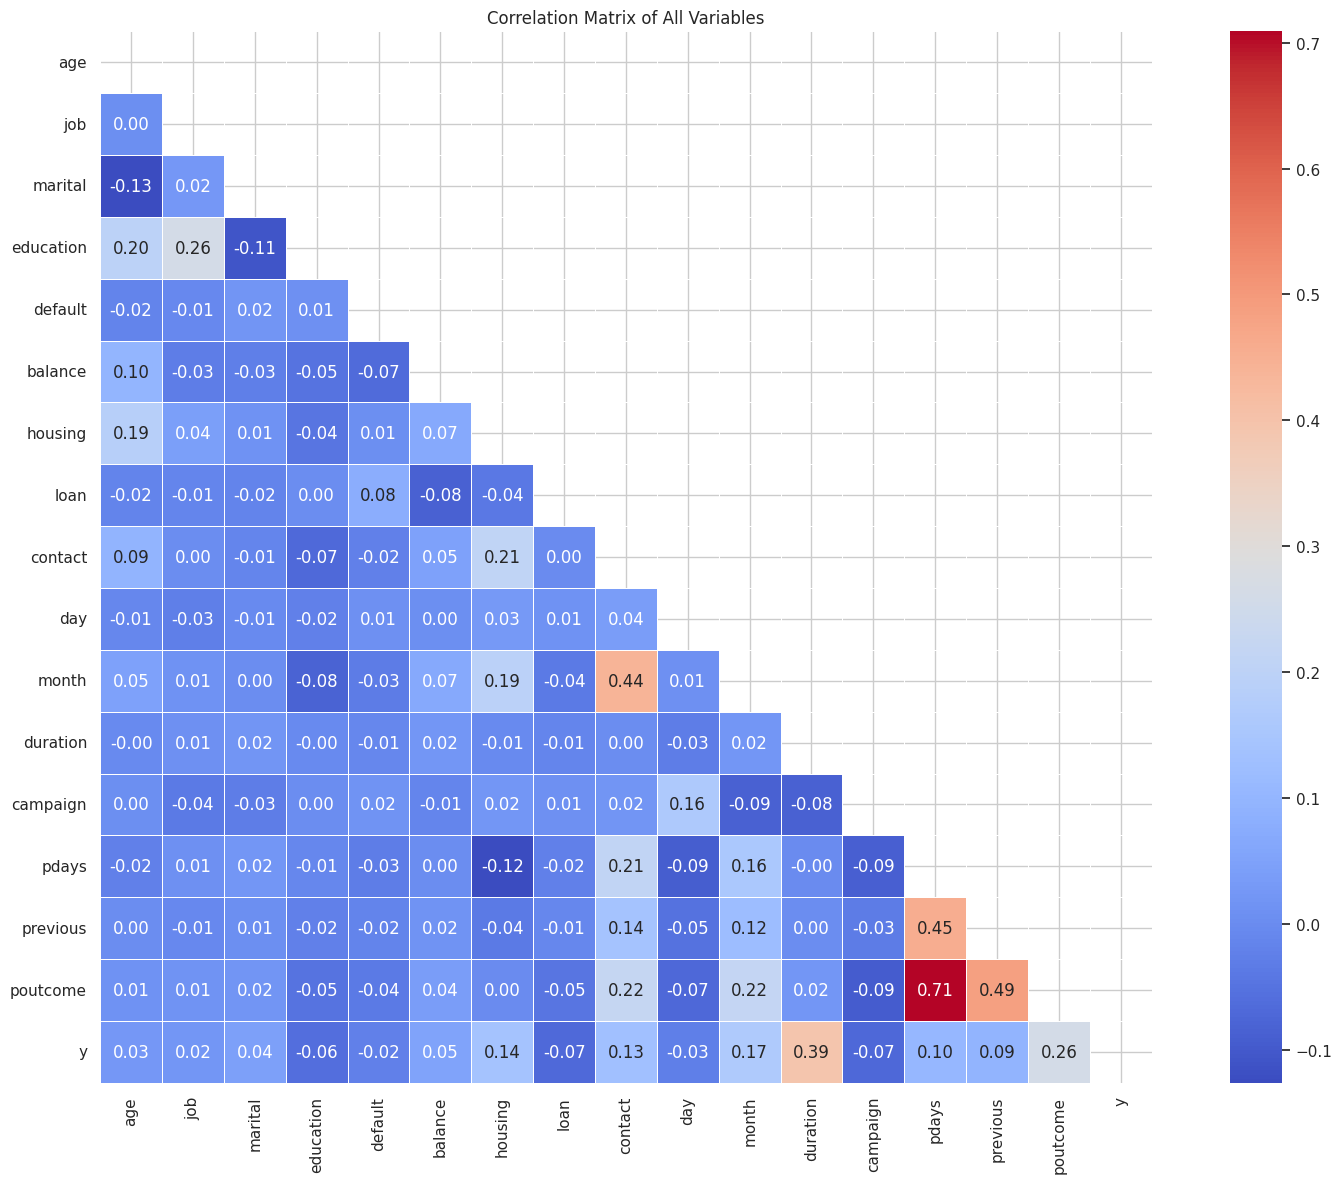

Top correlations with target variable 'y':


,y
y,1.000000
duration,0.394521
poutcome,0.259315
month,0.166663
housing,0.139173
contact,0.130590
pdays,0.103621
previous,0.093236
balance,0.052838
marital,0.043846


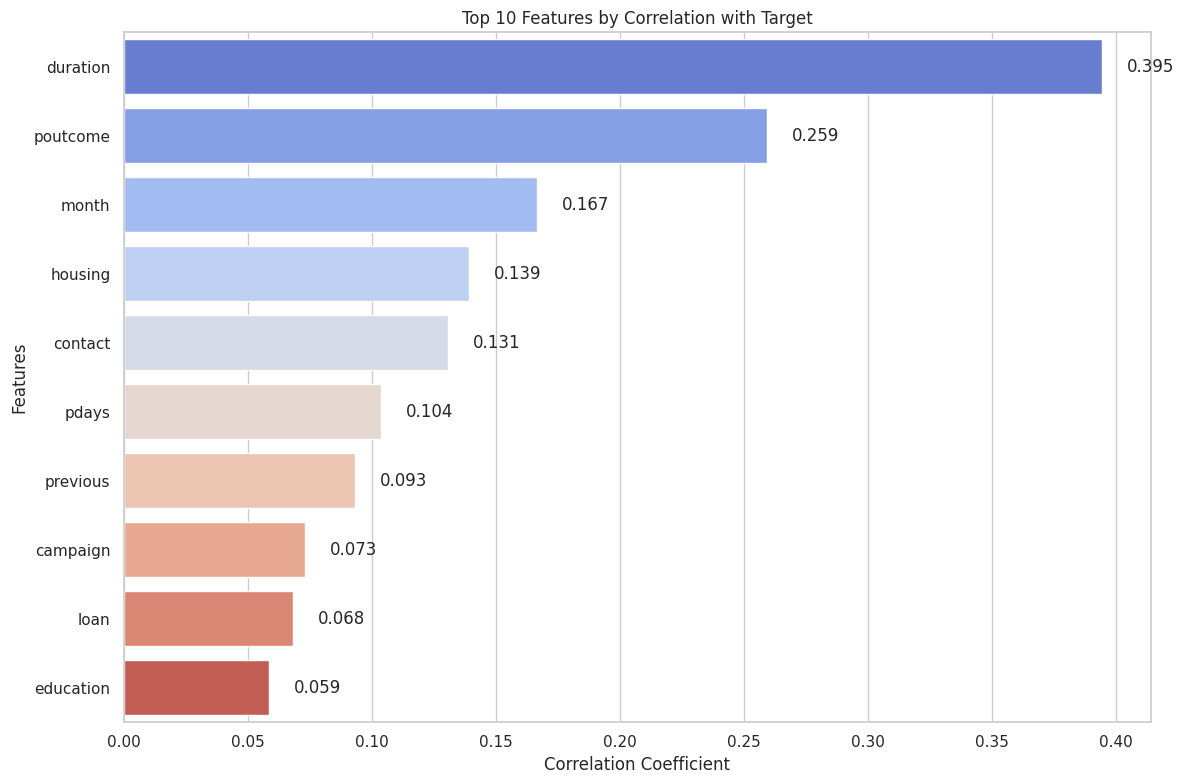

In [ ]:
# Convert categorical variables to numeric for correlation analysis
df_numeric = df.copy()
for col in categorical_cols:
    df_numeric[col] = pd.factorize(df_numeric[col])[0]

# Remove the 'age_group' column before calculating correlation
df_numeric = df_numeric.drop(columns=['age_group']) # Drop the age_group column

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            mask=mask, square=True, linewidths=0.5)
plt.title('Correlation Matrix of All Variables')
plt.tight_layout()
plt.show()

# Correlations with the target variable
target_corr = correlation_matrix['y'].sort_values(ascending=False)
print("Top correlations with target variable 'y':")
display(target_corr)

# Plot top correlations with target
plt.figure(figsize=(12, 8))
target_corr = target_corr[target_corr.index != 'y']  # Remove self-correlation
top_corr = target_corr.abs().sort_values(ascending=False).head(10)
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title('Top 10 Features by Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
for i, v in enumerate(top_corr.values):
    plt.text(v + 0.01 if v >= 0 else v - 0.07, i, f'{v:.3f}', va='center')
plt.tight_layout()
plt.show()


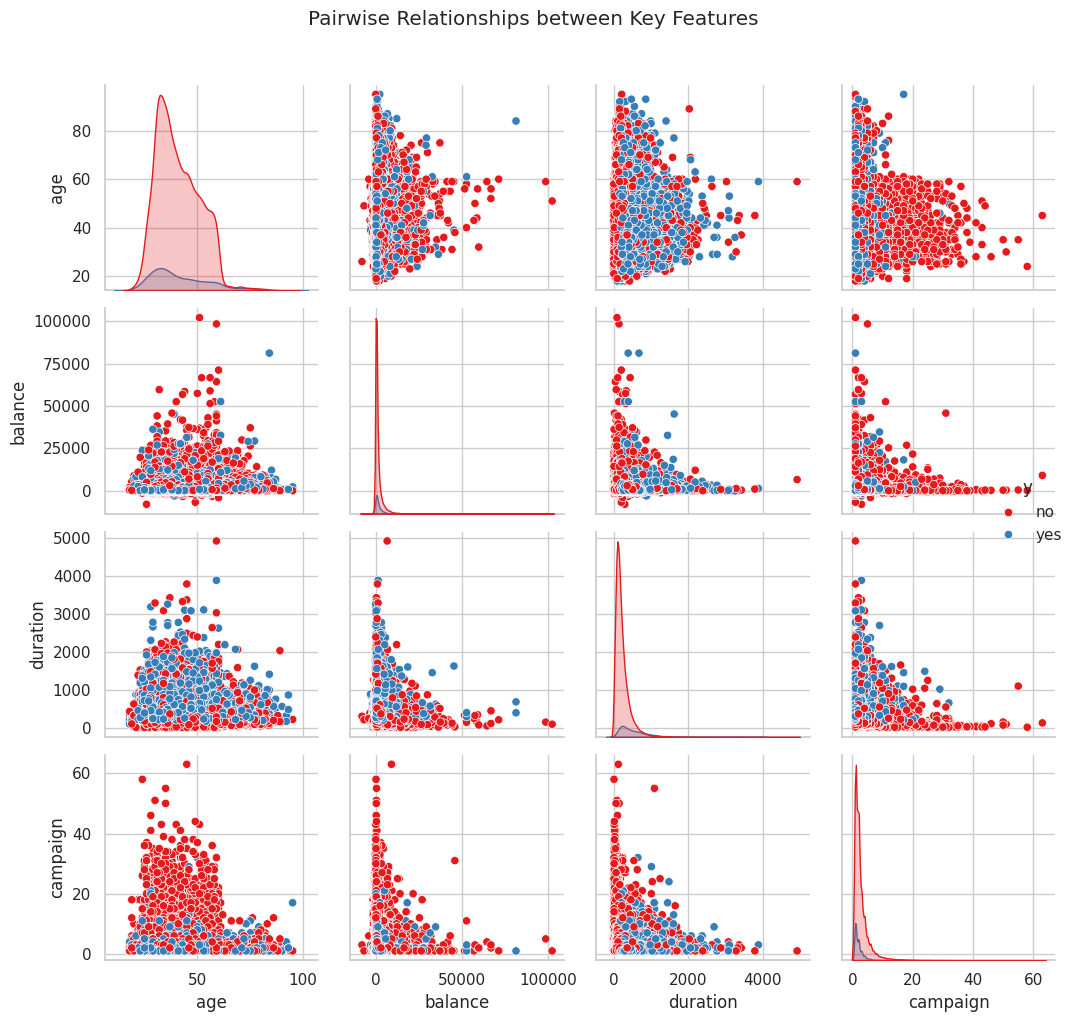

<Figure size 1200x800 with 0 Axes>

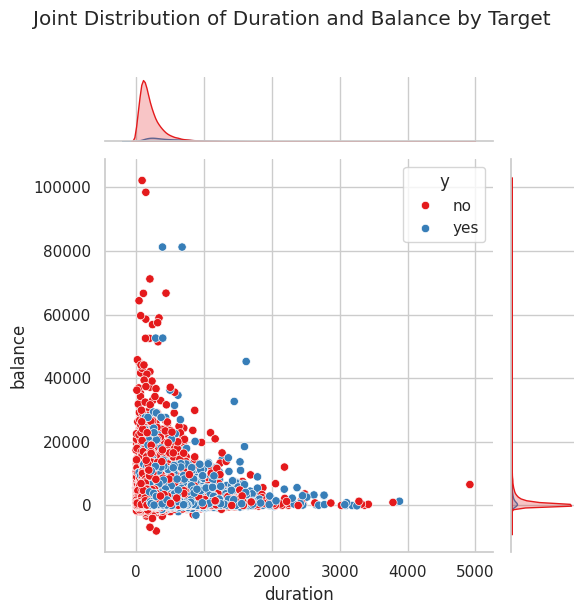

In [ ]:
# Create pairplot for selected important numerical features
important_features = ['age', 'balance', 'duration', 'campaign', 'y']
sns.pairplot(df, vars=[col for col in important_features if col != 'y'],
             hue='y', palette='Set1', diag_kind='kde', height=2.5)
plt.suptitle('Pairwise Relationships between Key Features', y=1.02)
plt.tight_layout()
plt.show()

# Joint plot for the most correlated numerical variable with target
# Assuming 'duration' has high correlation based on previous research
plt.figure(figsize=(12, 8))
sns.jointplot(x='duration', y='balance', data=df, hue='y', kind='scatter', palette='Set1')
plt.suptitle('Joint Distribution of Duration and Balance by Target', y=1.02)
plt.tight_layout()
plt.show()


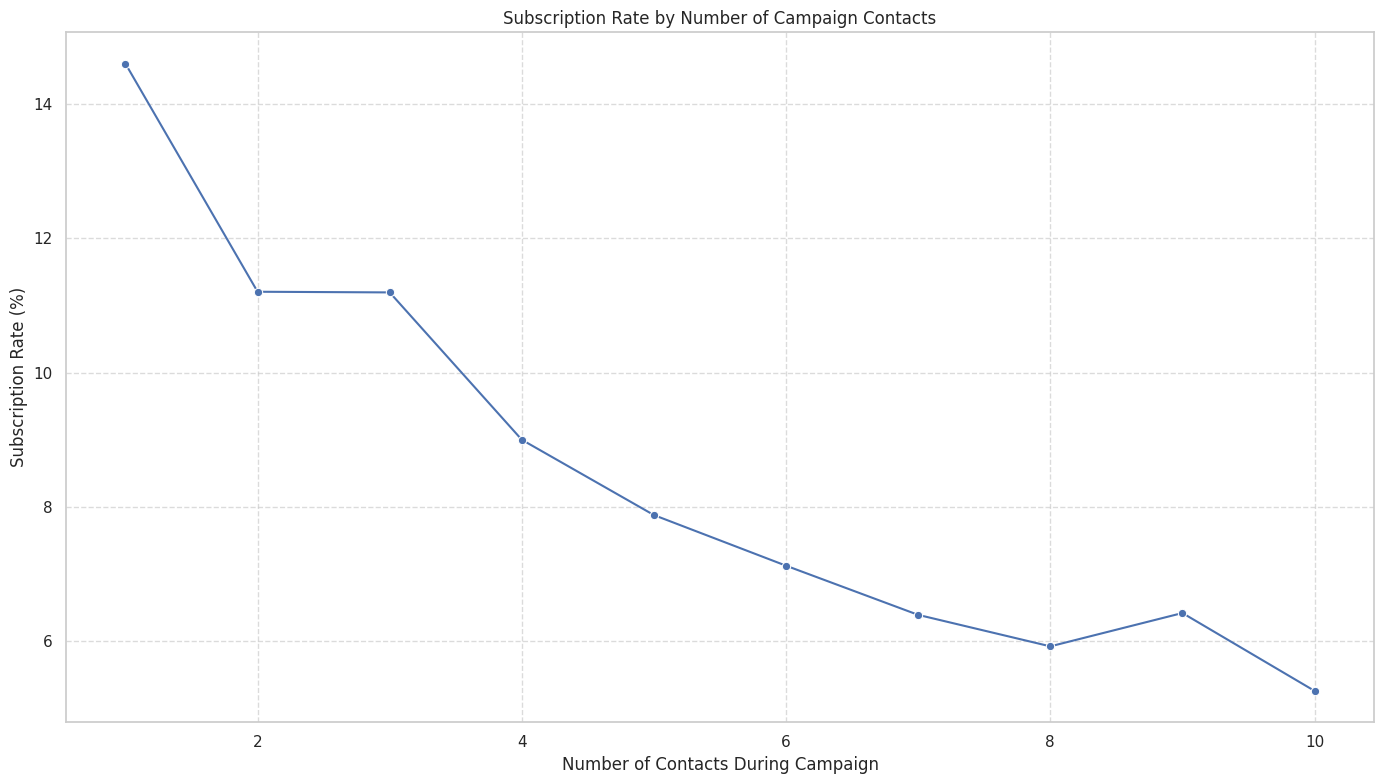

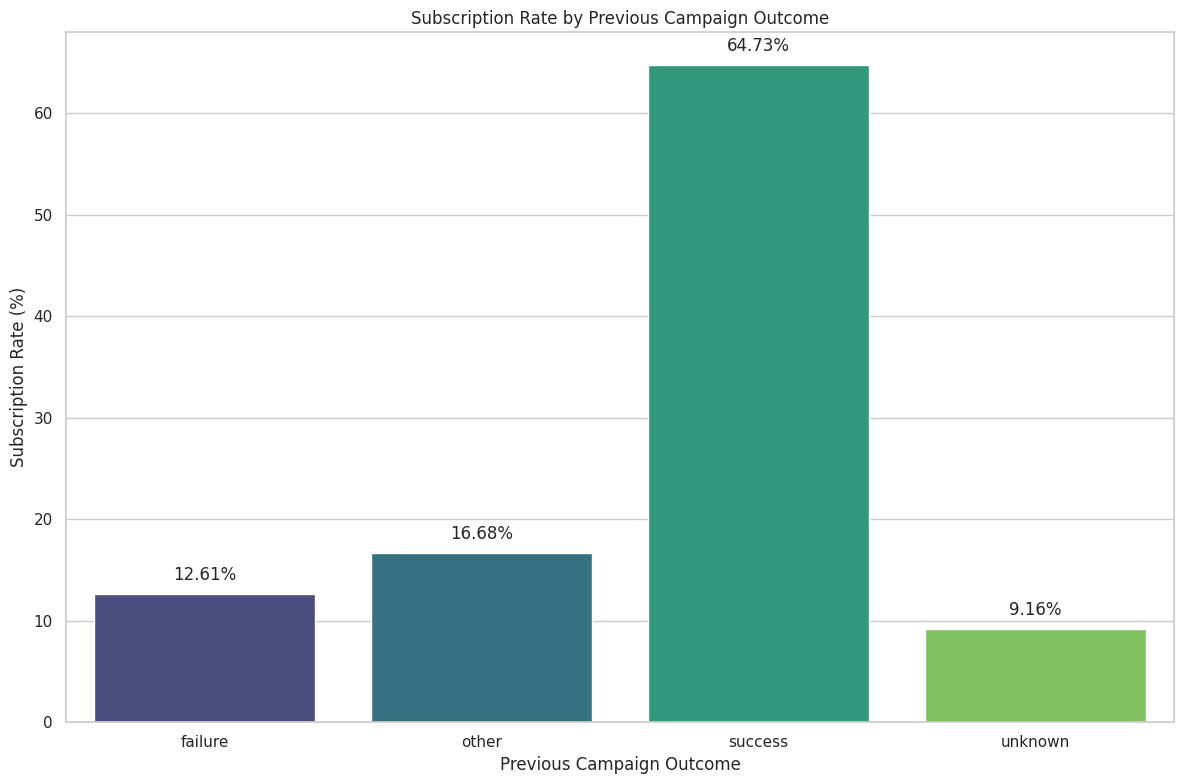

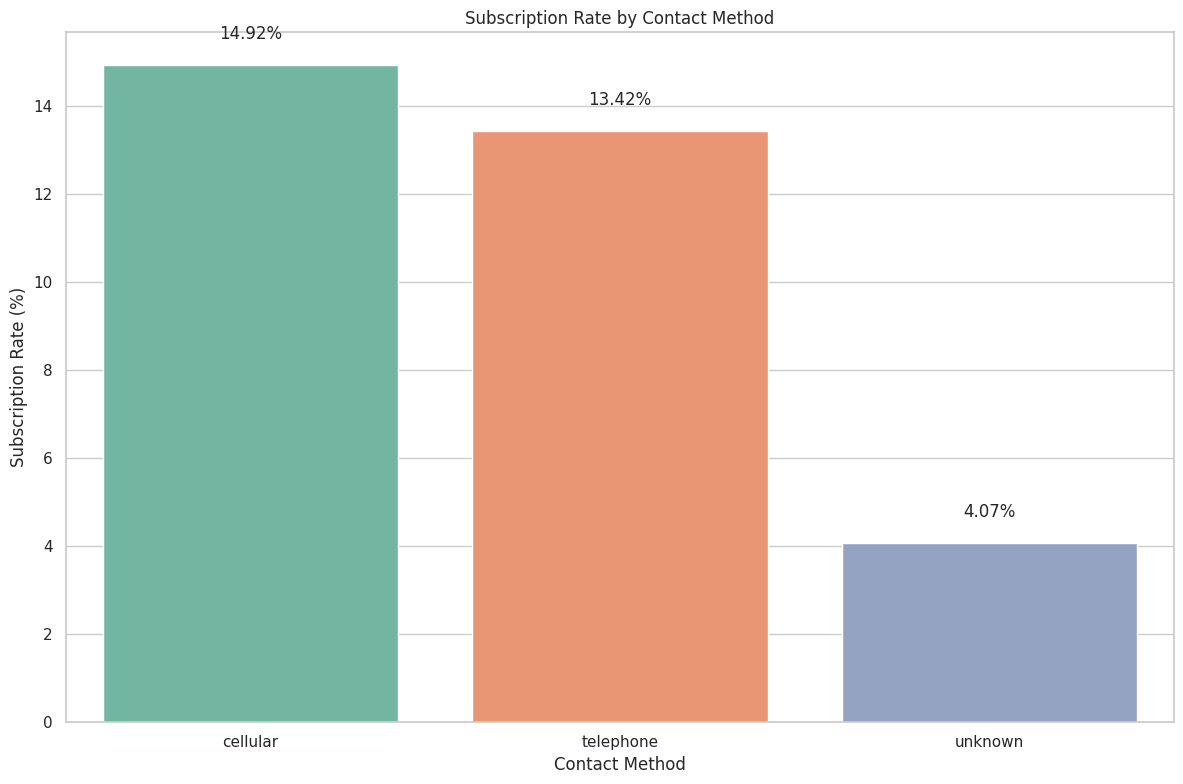

In [ ]:
# Analyze campaign count impact
campaign_subscription = df.groupby('campaign')['y'].apply(lambda x: (x == 'yes').mean() * 100).reset_index()
campaign_subscription.columns = ['campaign', 'subscription_rate_percent']

plt.figure(figsize=(14, 8))
sns.lineplot(x='campaign', y='subscription_rate_percent', data=campaign_subscription.iloc[:10], marker='o')
plt.title('Subscription Rate by Number of Campaign Contacts')
plt.xlabel('Number of Contacts During Campaign')
plt.ylabel('Subscription Rate (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analyze previous campaign outcome's impact
plt.figure(figsize=(12, 8))
previous_outcome = df.groupby('poutcome')['y'].apply(lambda x: (x == 'yes').mean() * 100).reset_index()
previous_outcome.columns = ['poutcome', 'subscription_rate_percent']

ax = sns.barplot(x='poutcome', y='subscription_rate_percent', data=previous_outcome, palette='viridis')
plt.title('Subscription Rate by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Subscription Rate (%)')
for i, v in enumerate(previous_outcome['subscription_rate_percent']):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Analyze contact method effectiveness
contact_subscription = df.groupby('contact')['y'].apply(lambda x: (x == 'yes').mean() * 100).reset_index()
contact_subscription.columns = ['contact', 'subscription_rate_percent']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='contact', y='subscription_rate_percent', data=contact_subscription, palette='Set2')
plt.title('Subscription Rate by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Subscription Rate (%)')
for i, v in enumerate(contact_subscription['subscription_rate_percent']):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


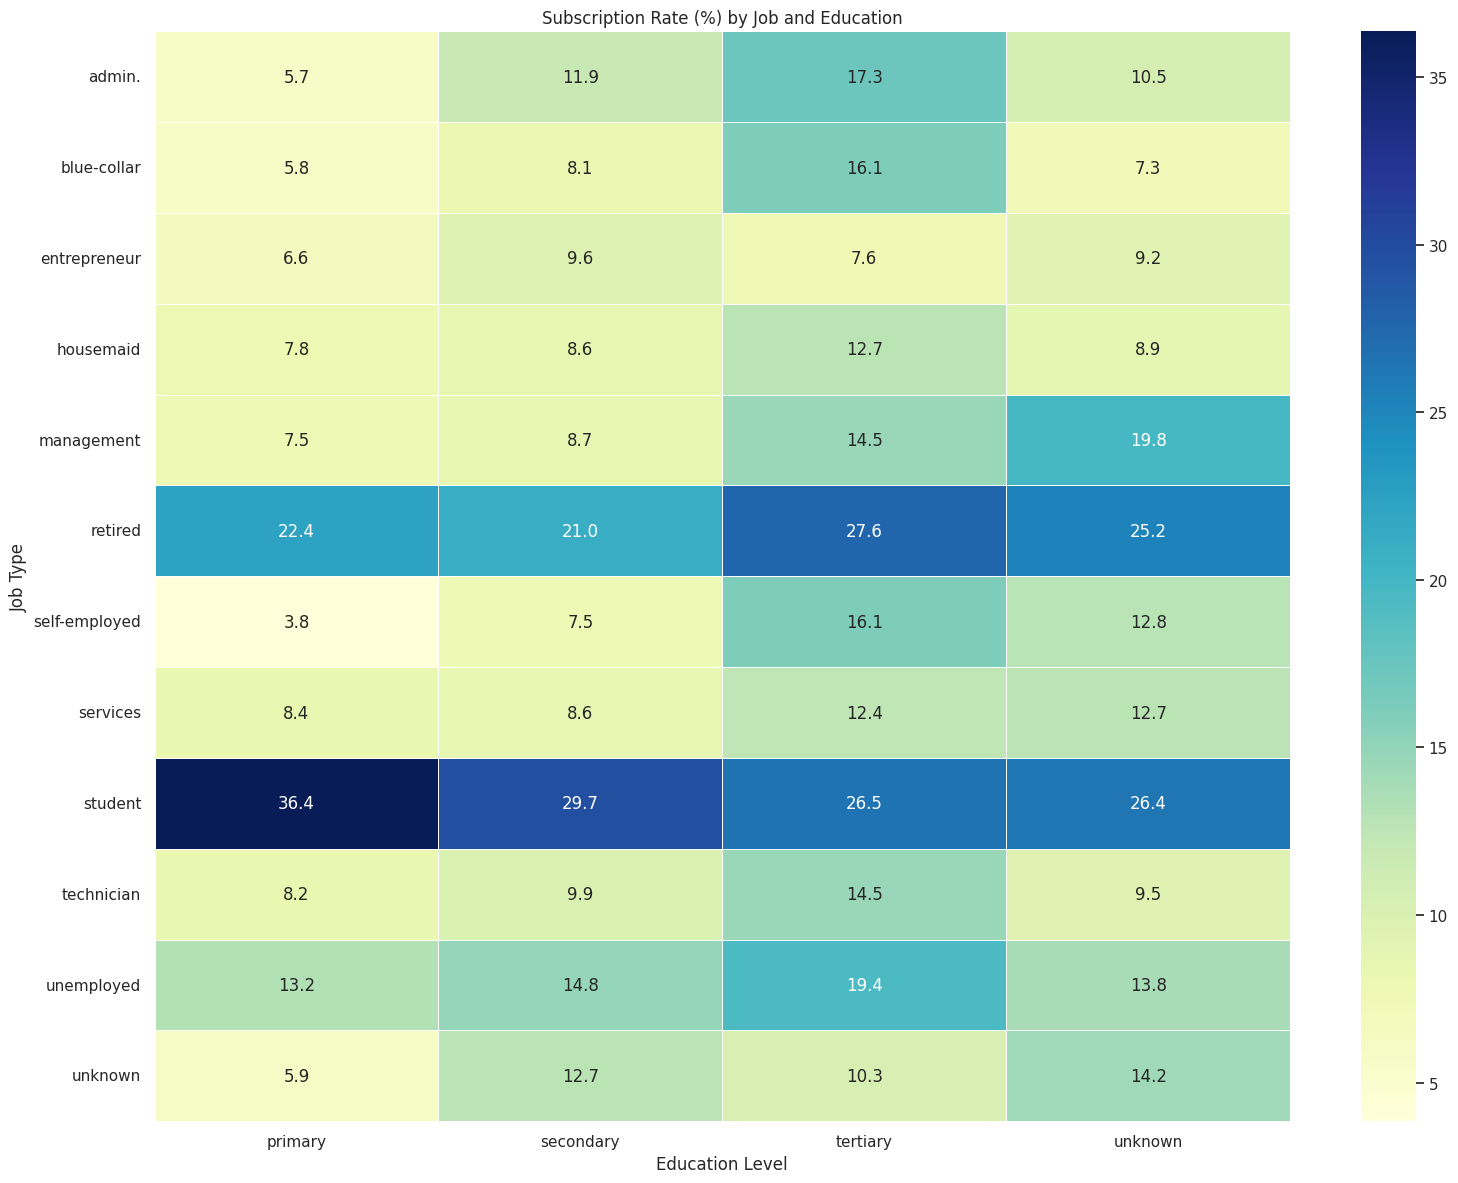

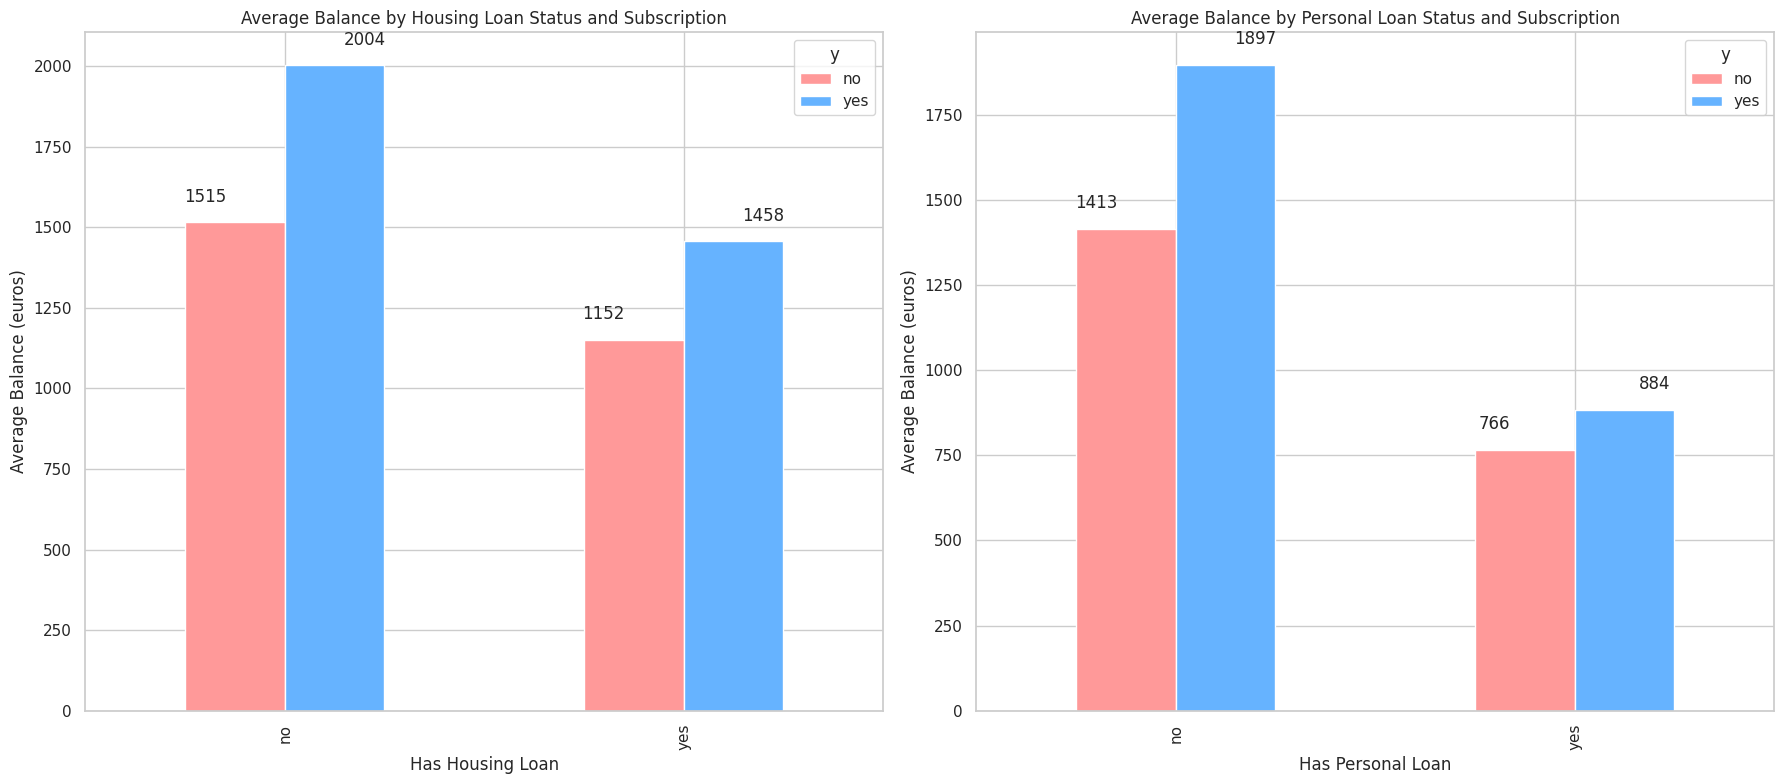

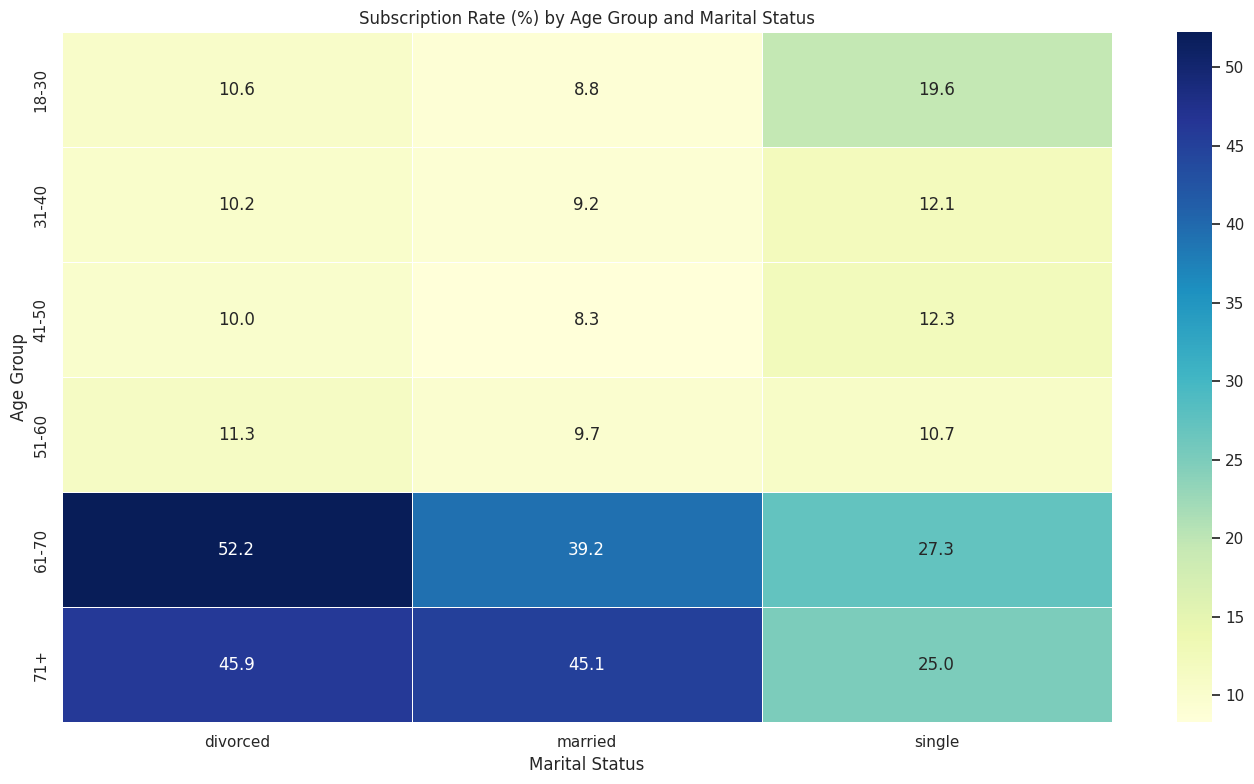

In [ ]:
# Create cross-tabulation of job and education with subscription rate
job_edu_subscription = pd.crosstab(
    index=df['job'],
    columns=df['education'],
    values=df['y'].map({'yes': 1, 'no': 0}),
    aggfunc='mean'
) * 100

plt.figure(figsize=(16, 12))
sns.heatmap(job_edu_subscription, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)
plt.title('Subscription Rate (%) by Job and Education')
plt.xlabel('Education Level')
plt.ylabel('Job Type')
plt.tight_layout()
plt.show()

# Analyze financial indicators (balance, housing loan, personal loan)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Housing loan analysis
housing_balance = df.groupby(['housing', 'y'])['balance'].mean().unstack()
housing_balance.plot(kind='bar', ax=axes[0], color=['#ff9999', '#66b3ff'])
axes[0].set_title('Average Balance by Housing Loan Status and Subscription')
axes[0].set_xlabel('Has Housing Loan')
axes[0].set_ylabel('Average Balance (euros)')
for i, v in enumerate(housing_balance.values.flatten()):
    axes[0].text(i//2 - 0.2 + (i%2)*0.4, v + 50, f'{v:.0f}', ha='center', va='bottom')

# Personal loan analysis
loan_balance = df.groupby(['loan', 'y'])['balance'].mean().unstack()
loan_balance.plot(kind='bar', ax=axes[1], color=['#ff9999', '#66b3ff'])
axes[1].set_title('Average Balance by Personal Loan Status and Subscription')
axes[1].set_xlabel('Has Personal Loan')
axes[1].set_ylabel('Average Balance (euros)')
for i, v in enumerate(loan_balance.values.flatten()):
    axes[1].text(i//2 - 0.2 + (i%2)*0.4, v + 50, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Age and marital status analysis
age_marital = pd.crosstab(
    index=df['age_group'],
    columns=df['marital'],
    values=df['y'].map({'yes': 1, 'no': 0}),
    aggfunc='mean'
) * 100

plt.figure(figsize=(14, 8))
sns.heatmap(age_marital, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)
plt.title('Subscription Rate (%) by Age Group and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


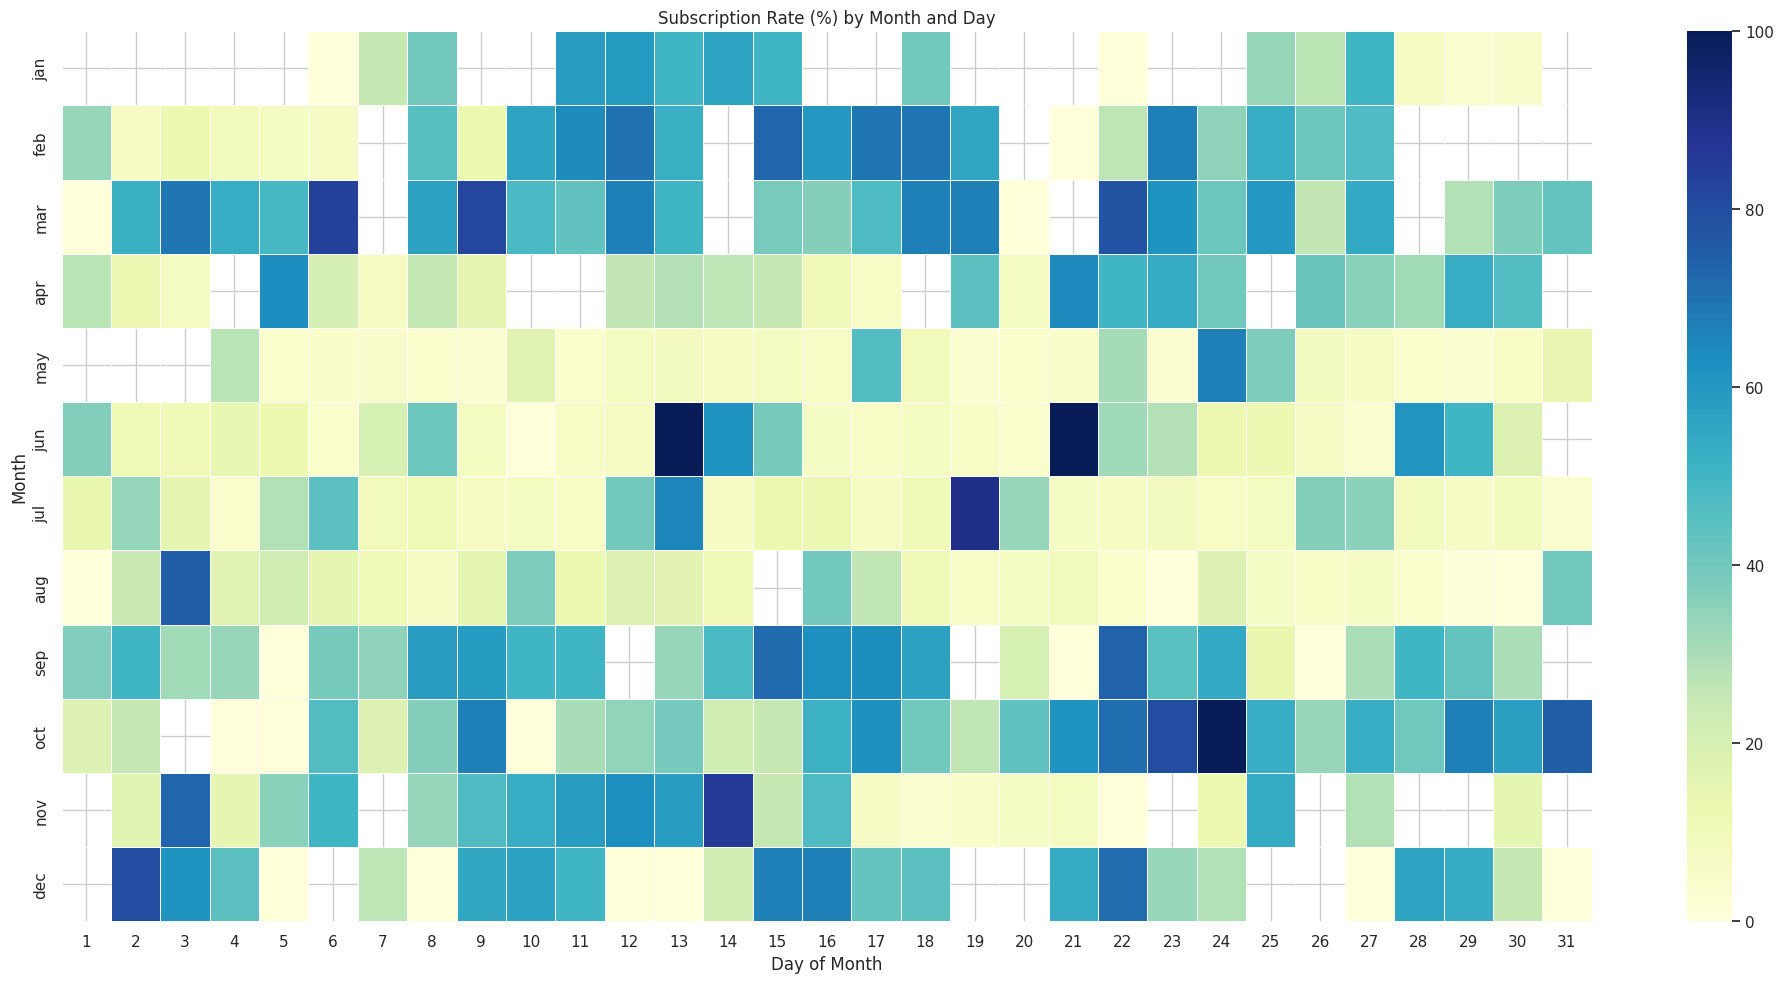

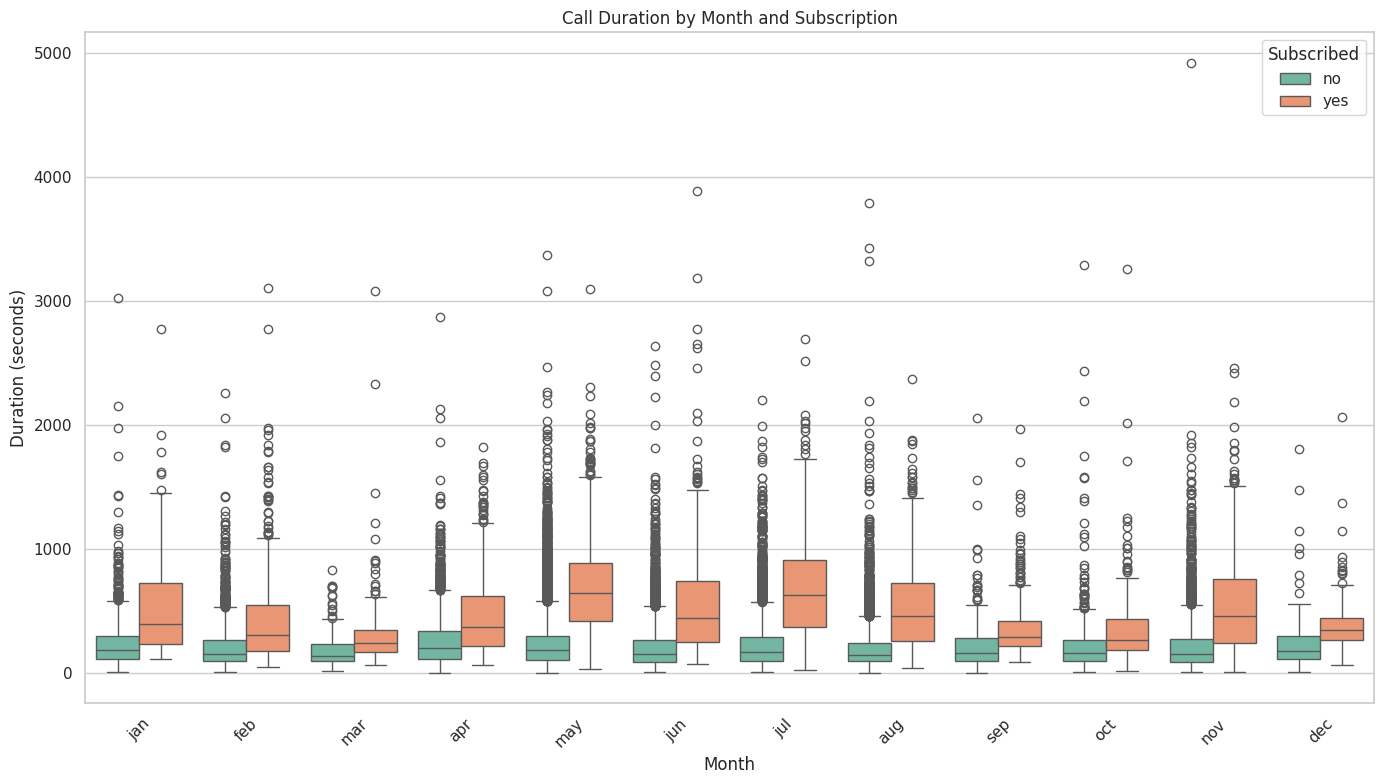

In [ ]:
# Month and day analysis
month_day_subscription = df.pivot_table(
    index='month',
    columns='day',
    values='y',
    aggfunc=lambda x: (x == 'yes').mean() * 100
)

plt.figure(figsize=(20, 10))
sns.heatmap(month_day_subscription, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('Subscription Rate (%) by Month and Day')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

# Duration analysis by month
plt.figure(figsize=(14, 8))
sns.boxplot(x='month', y='duration', hue='y', data=df, palette='Set2')
plt.title('Call Duration by Month and Subscription')
plt.xlabel('Month')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()


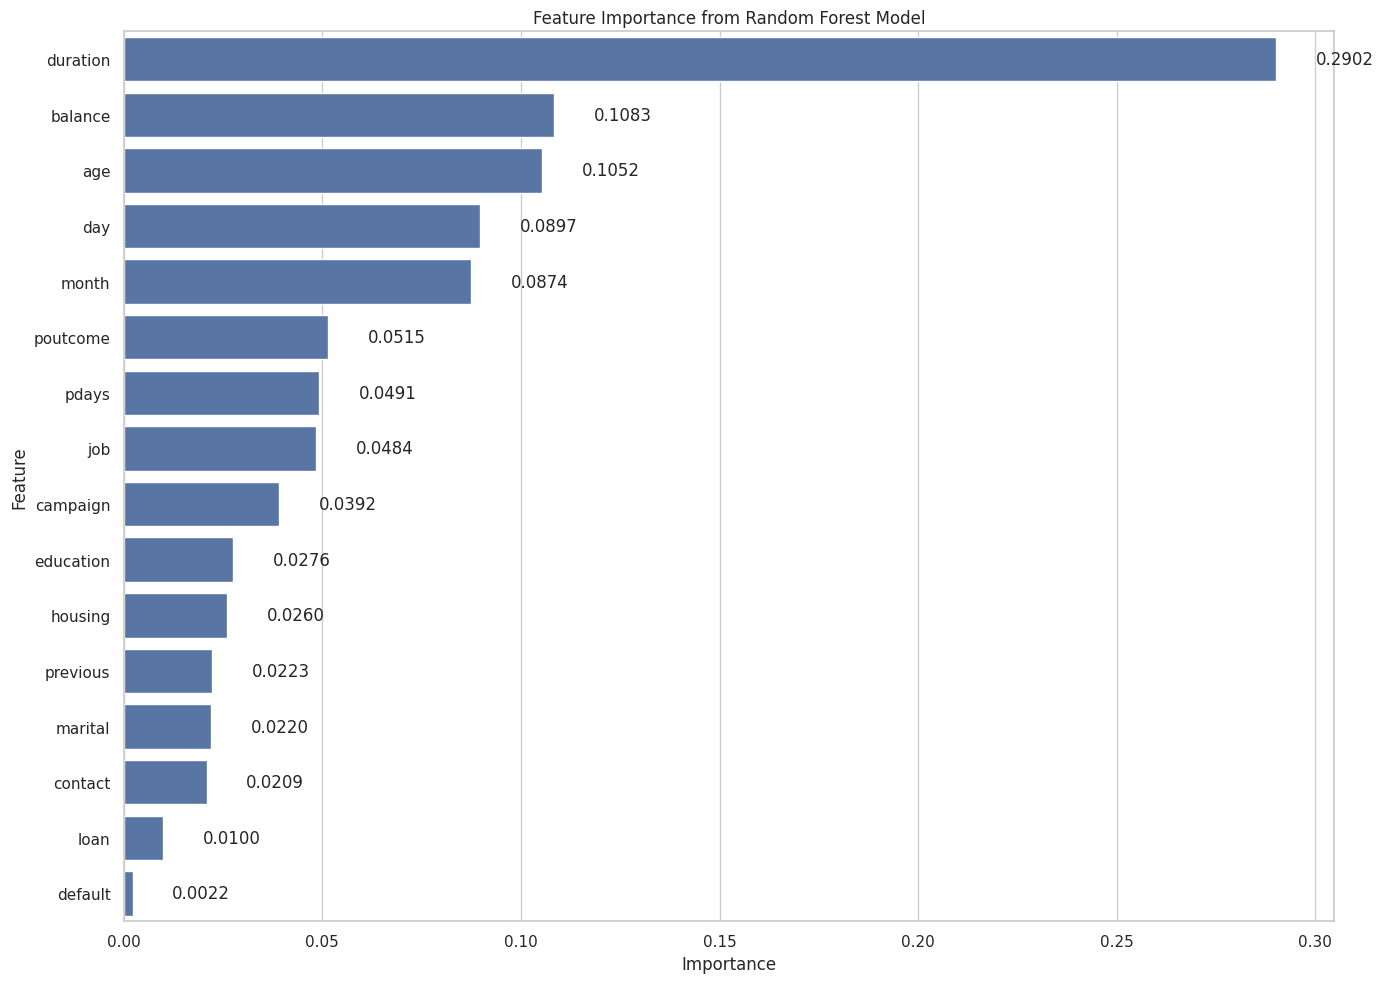

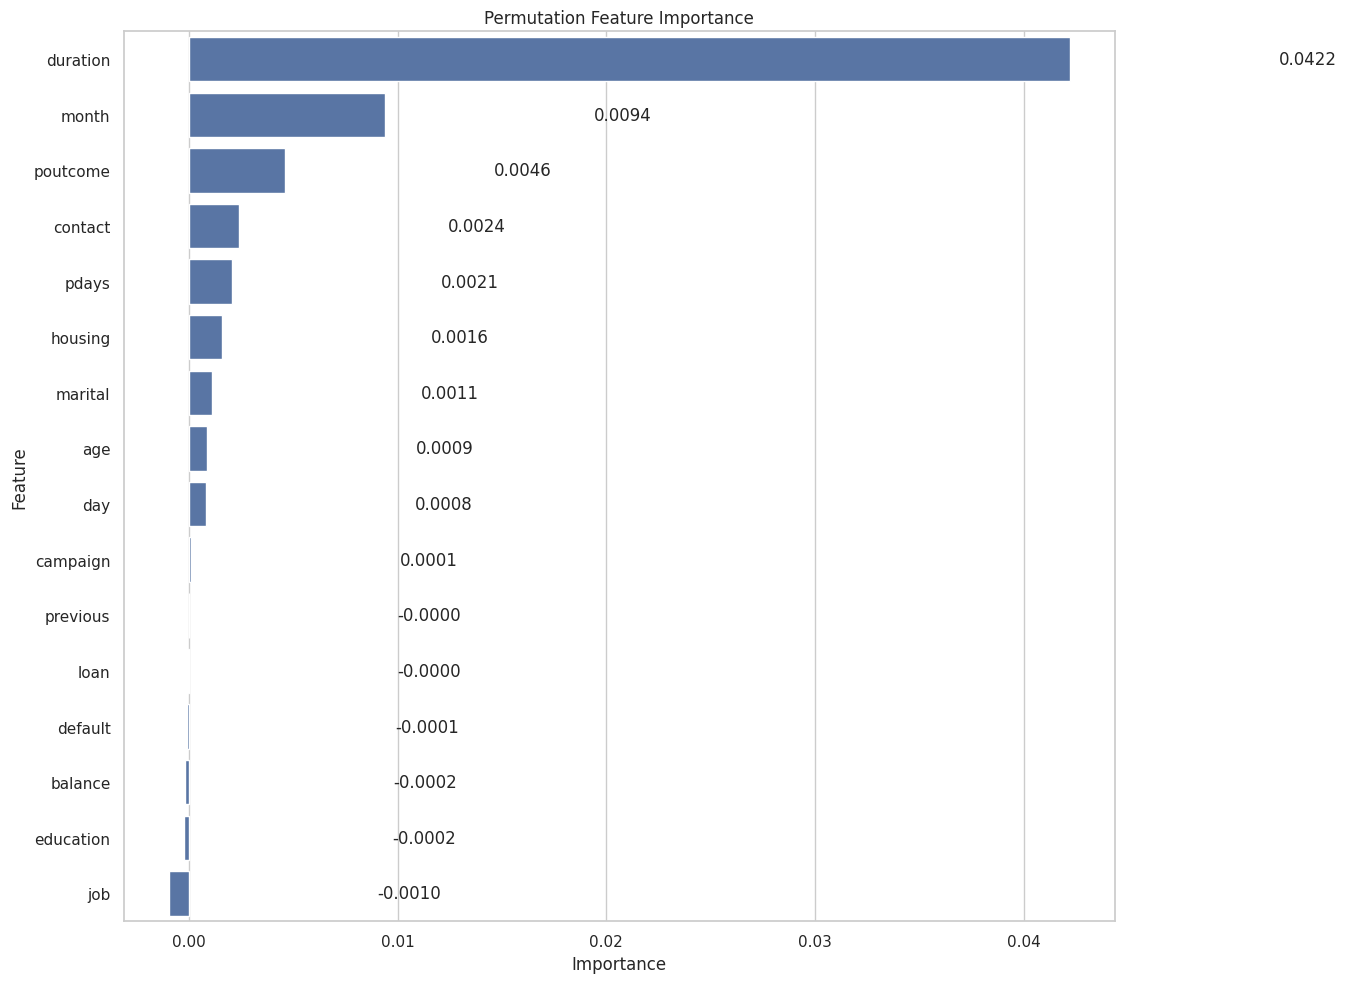

In [ ]:
# Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance

# Encode categorical variables
df_model = df.copy()

# Drop the 'age_group' column before encoding
df_model = df_model.drop(columns=['age_group'])

label_encoders = {}
for col in categorical_cols:
    # Skip encoding for 'age_group' as it's already removed
    if col == 'age_group':
        continue
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Split the data
X = df_model.drop('y', axis=1)
y = df_model['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(random_state=42) # Initialize the model
rf.fit(X_train, y_train) # Train the model

# Get feature importance
importance = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
for i, v in enumerate(feature_importance['Importance']):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})
perm_importance_df = perm_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
for i, v in enumerate(perm_importance_df['Importance']):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()